In [1]:
import psycopg2
import requests
import nbimporter
import datetime
import sys
import copy
import operator
import numpy as np
import matplotlib.pyplot as plt
import Init_database as indb
import pdb
from calendar import monthrange
from googletrans import Translator
import warnings
warnings.filterwarnings("ignore")

Importing Jupyter notebook from Init_database.ipynb


In [2]:
db_name="db_teld"
user_name="postgres"
password = "ecalscraping"
host="169.229.157.40"
port="5432"
conn = indb.init_db(db_name, user_name, password, host, port)

# 1. Check connection to database

In [3]:
try:
    cur = conn.cursor()
    stmt1 = "select ST_AsText(location) from tbl_app_eachstations"
    cur.execute(stmt1)
    station_loc1 = cur.fetchall()
    stmt2 = "select ST_X(location), ST_Y(location) from tbl_app_eachstations"
    cur.execute(stmt2)
    station_loc2 = cur.fetchall()
    cur.close()
except psycopg2.Error as e:
    print(e)
print(station_loc1[0])
print(station_loc2[0])

('POINT(116.26327 39.863907)',)
(116.26327, 39.863907)


In [4]:
# #------- Request stationid which has user activities from db -------#
try:
    cur = conn.cursor()
    cur.execute("select distinct stationid from tbl_app_useractivity;")
    stationWithAct_list = cur.fetchall()
    cur.close()
except psycopg2.Error as e:
    print(e)
print("Number of stations with user activites: ", len(stationWithAct_list))
# #------- Request pilecode from db for states -------#
# staid_list = []
# for staid in stationWithAct_list:
#     staid_list.append(staid[0])
try:
    cur = conn.cursor()
#     sta_list = ['33a3c031-0a3a-417d-ba1b-53549bb08dc2']
    sta_list = ['2b3a35d4-cb94-4b8f-a47a-bbb054754066', '1d02640a-7f14-4fc3-baaf-60754a38fff7',
                'ac6cb946-5fff-491b-859e-55cc5f701657', 'dd4a3ddc-e1b0-4e2e-b7ca-faef627f4e66',
                'b134a159-16bd-4f5d-af1b-cd42599a3bab', '33a3c031-0a3a-417d-ba1b-53549bb08dc2', 
                'e4758edb-1183-4c51-887b-a52ca7abef3d', '13bdab71-110b-4448-a3c4-5c3113183546']
    #1. beijing hangkong jingmi jixie yanjiusuo chongdianzhan --'2b3a35d4-cb94-4b8f-a47a-bbb054754066',
    #2. beijing xijiao bingguan chongdianzhan -- '1d02640a-7f14-4fc3-baaf-60754a38fff7
    #3. beijing yangguanglicheng jiudian chongdianzhan --'ac6cb946-5fff-491b-859e-55cc5f701657',
    #4. beijing rongtao gongsi chongdianzhan -- '32d317a9-3d0c-4458-8357-89a2b3b1cf94'
    #5. beijing huairou qu yanshui lu -- 'dd4a3ddc-e1b0-4e2e-b7ca-faef627f4e66'
    
    #6. shenzhen hengjiang dasha chongdianzhan -- 'b134a159-16bd-4f5d-af1b-cd42599a3bab'
    #7. shenzhen yinxing gongyeyuan chongdianzhan -- '33a3c031-0a3a-417d-ba1b-53549bb08dc2'
    #8. shenzhe wanke jiulongshan chongdianzhan -- 'e4758edb-1183-4c51-887b-a52ca7abef3d'
    #9. shenzhen jingyuan dasha chongdianzhan -- '13bdab71-110b-4448-a3c4-5c3113183546'
    stmt = "select pilecode from tbl_APP_pilecode where staid in %s"
    cur.execute(stmt, (tuple(sta_list),))
    
#     stmt = "select pilecode from tbl_APP_pilecode where staid = 'dd4a3ddc-e1b0-4e2e-b7ca-faef627f4e66'"
#     cur.execute(stmt)
#     cur.execute("select pilecode from tbl_APP_pilecode")
    pillcode_list = cur.fetchall()
    cur.close()
except psycopg2.Error as e:
    print(e)
print("Nubmer of pills: ", len(pillcode_list))

('Number of stations with user activites: ', 5531)
('Nubmer of pills: ', 86)


In [5]:
# #------- Request Shenzhen charging pilecode from db for states -------#
try:
    cur = conn.cursor()
#     stmt1 = "select stationid from tbl_app_eachstations where tbl_app_eachstations.location && \
#     ST_MakeEnvelope(115.37916, 39.47148, 117.15623, 40.81726, 4326);"    
    stmt1 = "select stationid from tbl_app_eachstations where tbl_app_eachstations.location && \
    ST_MakeEnvelope(113.85955, 22.50563, 114.17335, 22.69960, 4326) intersect select distinct stationid\
    from tbl_app_useractivity;"
    cur.execute(stmt1)
    sta_list_shenzhen = cur.fetchall()
    sta_list_sz_clean = []
    for sta in sta_list_shenzhen:
        sta_list_sz_clean.append(sta[0])
except psycopg2.Error as e:
    print(e)
print("Shenzhen stations: " + str(len(sta_list_sz_clean)))

Shenzhen stations: 81


In [6]:
# # #------- Request QingDao charging pilecode from db for states -------#
# try:
#     cur = conn.cursor()
# #     stmt1 = "select stationid from tbl_app_eachstations where tbl_app_eachstations.location && \
# #     ST_MakeEnvelope(115.37916, 39.47148, 117.15623, 40.81726, 4326);"    
#     stmt1 = "select stationid from tbl_app_eachstations where tbl_app_eachstations.location && \
#     ST_MakeEnvelope(119.410781, 35.592975, 120.892190, 37.189975, 4326) intersect select distinct stationid \
#     from tbl_app_useractivity;"
#     cur.execute(stmt1)
#     sta_list_qingdao = cur.fetchall()
#     sta_list_qingdao_clean = []
#     for sta in sta_list_qingdao:
#         sta_list_qingdao_clean.append(sta[0])
# except psycopg2.Error as e:
#     print(e)
# print("Qingdao stations: " + str(len(sta_list_qingdao_clean)))

# 2. Create a charing station object

In [7]:
class Station(object):
    "This is a station object"
    num_pills = 0
    def __init__(self, stationid, score, pricescore, servicescore, 
                 stationname, stationaddress, location):
        self.id = stationid
        self.score = score
        self.pricescore = pricescore
        self.servicescore = servicescore
        self.name = stationname
        self.addr = stationaddress
        self.GPS = location
        self.pills = []
        self.ult_data = []
    def add_Pill(self, pill_obj):
        self.pills.append(pill_obj)
        self.num_pills += 1
    def delete_numPills(self):
#         if self.pills >= 1:
#             self.pills -= 1
        pass
    def check_pill(self, pillcode):
        for pill in self.pills:
            #if exist return True
            if pill.pillcode == pillcode:
                return True
        return False
    def get_maxPower(self):
        maxPower = 0
        for pill in self.pills:
            if pill.isfast == "Y":
                maxPower += 60 #kw
            else:
                maxPower += 7 #kw
        return maxPower
    def get_stationName_Eng(self):
        translator = Translator()
        return translator.translate(self.name).text

# 3. Create a charging pill object

In [8]:
class Pill(Station):
    ult_data = None
    def __init__(self, pillcode, voltage, description, isfast, chargingport, power, pricedesc, prices, station):
        self.pillcode = pillcode
        self.voltage = voltage
        self.description = description
        self.isfast = isfast
        self.chargingport = chargingport
        self.power = power
        self.pricedesc = pricedesc
        self.prices = prices
        self.station = station
    def update_ultData(self, ult_data_new):
        self.ult_data = ult_data_new

# 4. Functions to request database

In [9]:
# #------- Request one pill daily utilization data from db -------#
def get_pill_daily(pillcode):
    try:
        cur = conn.cursor()
        stmt = "select statecodev3, statenamev3, time from tbl_APP_state where pillcode='{}' \
        order by time".format(pillcode)
        cur.execute(stmt)
        ult_data = cur.fetchall()
        cur.close()
    except psycopg2.Error as e:
        print(e)
    return ult_data

In [10]:
# #------- Request the pill details from db -------#
def get_pill_details(pillcode):
    try:
        cur = conn.cursor()
        stmt = "select voltage, description, isfast, chargingport, power, pricedesc, \
        prices from tbl_app_piles where pillcode='{}'".format(pillcode)
        cur.execute(stmt)
        pill_details = cur.fetchall()
        cur.close()
        return pill_details
    except psycopg2.Error as e:
        print(e)

In [11]:
# #------- Request the station details from db -------#
def get_sta_details(stationid):
    try:
        cur = conn.cursor()
        stmt = "select servicescore, score, pricescore, stationname, stationaddress, ST_X(location), ST_Y(location) \
        from tbl_app_eachstations where stationid='{}'".format(stationid)
        cur.execute(stmt)
        sta_details = cur.fetchall()
        cur.close()
    except psycopg2.Error as e:
        print(e)
    return sta_details
    

In [12]:
# #------- Request pillcodes from same station from db -------#
def get_pillcodes(stationid=sta_list[0]):
    try:
        cur = conn.cursor()
        stmt = "select pillcode from tbl_app_piles where staid='{}'".format(stationid)
        cur.execute(stmt)
        pillcode_list = cur.fetchall()
        cur.close()
    except psycopg2.Error as e:
        print(e)
    return pillcode_list

## 4.1 Get target pillcode list, pill details and station details list

In [13]:
def get_pill_station_details(sta_list):
    pillcode_list = []
    pill_details_list = []
    sta_details_list = []
    for staid in sta_list:
        pillcode_list.append(get_pillcodes(staid))
        pill_details_list.append(get_pill_details(pillcode_list[0][0][0]))
        sta_details_list.append(get_sta_details(staid))
    return pillcode_list, pill_details_list, sta_details_list

## 4.2 Example

In [14]:
# 深圳银星工业园充电站
pillcode_list_YinXing, pill_details_YinXing, sta_details_YinXing = get_pill_station_details([sta_list[-3]])

#____________________________#
#All stations in the sta_list
pillcode_list, pill_details_list, sta_details_list = get_pill_station_details(sta_list)

In [15]:
#Shenzhen all station
pillcode_sz_list, pill_details_sz_list, sta_details_sz_list = get_pill_station_details(sta_list_sz_clean)

In [16]:
for _ in pillcode_list_YinXing[0]:
    print(_[0])
print("__________________")
print("pill details: \n")
for _ in pill_details_YinXing[0][0]:
    print(_)
print("__________________")
print("station details: \n")
for _ in sta_details_YinXing[0][0]:
    print(_)

4403060011105
4403060011103
4403060011109
4403060011201
4403060011106
4403060011203
4403060011202
4403060011108
4403060011210
4403060011102
4403060011107
4403060011110
4403060011207
4403060011209
4403060011101
4403060011104
4403060011206
4403060011205
4403060011204
__________________
pill details: 


00:00~24:00:0.700000:00~24:00:1.0000
N
国标2011 

电费:00:00~24:00:1.0000;服务费:00:00~24:00:0.7000
[{u'servicePrice': u'0.7000', u'timeRange': u'00:00-24:00', u'electricPrice': u'1.0000', u'startTime': u'00:00'}]
__________________
station details: 

3.6
4.3
3.6
深圳银星工业园充电站
广东省深圳市宝安区龙华新区观光路1301号银星高科技工业园
114.04726
22.7296


In [17]:
for _ in pillcode_list[0]:
    print(_[0])
print("__________________")
print("pill details: \n")
for _ in pill_details_list[0][0]:
    print(_)
print("__________________")
print("station details: \n")
for _ in sta_details_list[0][0]:
    print(_)

1101060331210
1101060331209
1101060331102
1101060331104
1101060331103
1101060331101
1101060331203
1101060331207
1101060331204
1101060331208
1101060331205
1101060331201
1101060331206
1101060331202
__________________
pill details: 


00:00~24:00:0.800000:00~24:00:1.2000
N
国标2011 国标2015 

电费:00:00~24:00:1.2000;服务费:00:00~24:00:0.8000
[{u'servicePrice': u'0.8000', u'timeRange': u'00:00-24:00', u'electricPrice': u'1.2000', u'startTime': u'00:00'}]
__________________
station details: 

--
--
--
北京航空精密机械研究所充电站
北京市市辖区丰台区南苑东路5号
116.407528
39.806932


# 5. Functions to construct stations and pills

In [18]:
def init_sta(stationid, score, pricescore, 
               servicescore, stationname, stationaddress, x, y):
    """
    Data cleansing + passing into Station object to initiate
    """
    location  = (x, y)
    station = Station(stationid, score, pricescore, servicescore, stationname, stationaddress, location)
    return station

In [19]:
def constr_pill(pillcode, voltage, description, isfast, 
                chargingport, power, pricedesc, prices, station):
    """
    Data cleansing + passing into Pill object to initiate
    """
    pill = Pill(pillcode, voltage, description, isfast, chargingport, power, pricedesc, prices, station)
    return pill

In [20]:
def constr_sta(pillcode_list, station):
    """
    Construct full station and pills included
    """
    for pillcode in pillcode_list:
        pill_details = get_pill_details(pillcode=pillcode[0])
        if not station.check_pill(pillcode[0]):
            pill = constr_pill(pillcode[0], pill_details[0][0], pill_details[0][1], pill_details[0][2],
                  pill_details[0][3], pill_details[0][4], pill_details[0][5], pill_details[0][6], station)
            station.add_Pill(pill)
    return station

In [21]:
def update_ultData(station):
    for pill in station.pills:
        pillcode = pill.pillcode
        ult_data = get_pill_daily(pillcode)
        pill.update_ultData(ult_data)
    return station

## 5.1 Initiate station object

In [22]:
def init_station_obj(sta_list, sta_details_list):
    staObject_list = []
    for i, staid in enumerate(sta_list):
        station_obj = init_sta(staid, sta_details_list[i][0][0], sta_details_list[i][0][1], 
                               sta_details_list[i][0][2], sta_details_list[i][0][3], 
                               sta_details_list[i][0][4], sta_details_list[i][0][5], 
                               sta_details_list[i][0][6])
        staObject_list.append(station_obj)
    return staObject_list

### 5.1.1 Initiate one single station object

In [23]:
YinXing_IndustrialPark_sta =init_sta(sta_list[-3], sta_details_YinXing[0][0], 
                                     sta_details_YinXing[0][0][1], sta_details_YinXing[0][0][2],
                                     sta_details_YinXing[0][0][3], sta_details_YinXing[0][0][4], 
                                     sta_details_YinXing[0][0][5], sta_details_YinXing[0][0][6])

In [24]:
print(sorted([YinXing_IndustrialPark_sta.pills[i].pillcode for i in range(len(YinXing_IndustrialPark_sta.pills))]))

[]


In [25]:
len(sorted([YinXing_IndustrialPark_sta.pills[i].pillcode for i in range(len(YinXing_IndustrialPark_sta.pills))]))

0

### 5.1.2 Initiate a list of station object

In [26]:
staObject_list = []
for i, staid in enumerate(sta_list):
    station_obj = init_sta(staid, sta_details_list[i][0][0], sta_details_list[i][0][1], 
                           sta_details_list[i][0][2], sta_details_list[i][0][3], sta_details_list[i][0][4], 
                           sta_details_list[i][0][5], sta_details_list[i][0][6])
    staObject_list.append(station_obj)

In [27]:
staObject_sz_list = []
for i, staid in enumerate(sta_list_sz_clean):
    station_obj = init_sta(staid, sta_details_sz_list[i][0][0], sta_details_sz_list[i][0][1], 
                           sta_details_sz_list[i][0][2], sta_details_sz_list[i][0][3], 
                           sta_details_sz_list[i][0][4], sta_details_sz_list[i][0][5], 
                           sta_details_sz_list[i][0][6])
    staObject_sz_list.append(station_obj)

## 5.2 Construct full station object

In [28]:
def constr_station_objFull(staObject_list, pillcode_list):
    for i, pillcodes in enumerate(pillcode_list):
        staObject_list[i] = constr_sta(pillcodes, staObject_list[i])
    return staObject_list

### 5.2.1 Construct a single station object full with pills included

In [29]:
YinXing_IndustrialPark_sta = constr_station_objFull([YinXing_IndustrialPark_sta], pillcode_list_YinXing)
YinXing_IndustrialPark_sta = constr_sta(pillcode_list_YinXing[0], YinXing_IndustrialPark_sta[0])
##-----YinXing_IndustrialPark_sta is a station object now not a list.
print(YinXing_IndustrialPark_sta.num_pills)

19


### 5.2.2 Construct a list of station objects full with pills included

In [30]:
staObject_list = constr_station_objFull(staObject_list, pillcode_list)
for i, pillcodes in enumerate(pillcode_list):
    staObject_list[i] = constr_sta(pillcodes, staObject_list[i])
#     print(staObject_list[i].num_pills)

In [31]:
#all station for shenzhen
staObject_sz_list = constr_station_objFull(staObject_sz_list, pillcode_sz_list)
for i, pillcodes in enumerate(pillcode_sz_list):
    staObject_sz_list[i] = constr_sta(pillcodes, staObject_sz_list[i])

## 5.3 Update daily utilization data for the station

In [32]:
def update_daily_ultData(staObject_list):
    """
        Takes in a list of station
        Returns a list if list length > 1, a station object if length = 0
    """
    if len(staObject_list) == 1:
        return update_ultData(staObject_list[0])
    else:
        for i in range(len(staObject_list)):
            staObject_list[i] = update_ultData(staObject_list[i])
        return staObject_list

### 5.3.1 Update daily utilization data for a single station

In [33]:
YinXing_IndustrialPark_sta = update_daily_ultData([YinXing_IndustrialPark_sta])
YinXing_IndustrialPark_sta = update_ultData(YinXing_IndustrialPark_sta)
print(YinXing_IndustrialPark_sta.pills[0].ult_data[0][2])

2017-09-10 23:35:34.441082-07:00


### 5.3.2 Update daily utilization data for a list of stations

In [34]:
#eight stations
staObject_list = update_daily_ultData(staObject_list)

In [35]:
print(staObject_list[0].pills[0].ult_data[0][2])
print(staObject_list[0].name)

2017-09-10 23:07:42.807157-07:00
北京航空精密机械研究所充电站


In [36]:
#shenzhen all stations
staObject_sz_list = update_daily_ultData(staObject_sz_list)

In [37]:
print(staObject_sz_list[0].pills[0].ult_data[0][2])
print(staObject_sz_list[0].name)

2017-09-10 23:29:57.373531-07:00
深圳水木丹华充电站


# 6. Data Visualization - Plotting

In [38]:
YinXing_IndustrialPark_sta.pills[0].ult_data[0][2]

datetime.datetime(2017, 9, 10, 23, 35, 34, 441082, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None))

In [39]:
def comp_date(date1, date2):
    """
        Compare two dates
        Return True if date1 later than date2
    """
    if date1 > date2:
        return True
    else:
        return False

In [40]:
def find_indxBoundary(pill, day_lowerBound, day_range):
    """
        Find index of first and last data on the desired day ranges
        pill - pill object
        day_lowerBound - dateTime object
        day_range - integer
        Return boundary_list
    """
    boundary_list = []
    prior_check = 0
    last_check = 0
    for day in range(day_range):
        for index, data in enumerate(pill.ult_data):
            if data[2].tzinfo._offset.seconds == 61200:
                offset = -420
            elif data[2].tzinfo._offset.seconds == 57600:
                offset = -480
            day_lowerBound = datetime.datetime(day_lowerBound.year, day_lowerBound.month, day_lowerBound.day, \
                                               tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None))
            day_upperBound = day_lowerBound + datetime.timedelta(days=1)
            if (not prior_check) & comp_date(data[2], day_lowerBound):
                #Goes in the desired period
                prior_check = 1
                boundary_list.append(index)
            elif (not last_check) & comp_date(data[2], day_upperBound):
                #Goes out of the desired period
                last_check = 1
                boundary_list.append(index)   
        day_lowerBound = day_upperBound
        prior_check = 0
        last_check = 0
    if len(boundary_list) == 0:
#         pdb.set_trace()
#         raise ValueError("no index found.")
        print(day_lowerBound, "find_indexBoundary: no index found")
        pass
    return boundary_list            

In [41]:
def create_timeOfDay(day_lowerBound, timestamp=15):
    """
        Create X-axis for plotting
        timestamp - assuming multiple of 15 (minutes)
    """
    timeOfDay = []
    pts_per_min = int(60/timestamp)
    minutes = [timestamp*i for i in range(pts_per_min)]
    year = day_lowerBound.year
    month = day_lowerBound.month
    day = day_lowerBound.day
    for i in range(24):
        for minute in minutes:
            date_obj = datetime.datetime(year, month, day, i, minute, 0, 
                                         tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None))
            timeOfDay.append(date_obj)
    return timeOfDay

In [42]:
def find_timeIdx(dateTime, timestamp=15):
    """
    timestamp - assuming multiple of 15 (minutes)
    Boundaries and intervals:
        52:31 -- [00:00] -- 7:30 --> Index 0 
        7:31 -- [15:00] -- 22:30 --> Index 1
        22:31 -- [30:00] -- 37:30 --> Index 2
        37:31 -- [45:00] -- 52:30 --> Index 3
    """
    if dateTime.tzinfo._offset.seconds == 61200:
        offset = -420
    elif dateTime.tzinfo._offset.seconds == 57600:
        offset = -480
    if timestamp == 15:
#         pdb.set_trace()
        if dateTime.day - 1 == 0:
            if dateTime.month - 1 == 0:
                # First interval of a new calendar year
                if dateTime.hour == 0 and datetime.datetime(dateTime.year-1, 12, 31, 23, 52, 31, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 30, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
                    return 0
            else:
                # First interval of a new month
                dayEnd = monthrange(dateTime.year, dateTime.month-1)[-1]
                if dateTime.hour == 0 and datetime.datetime(dateTime.year, dateTime.month-1, dayEnd, 23, 52, 31, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 30, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
                    return 0
                elif dateTime.hour != 0 and datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour-1, 52, 31, \
                                                              tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 30, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
                    return dateTime.hour*4
                else:
                    if datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 31, \
                                         tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) < dateTime and dateTime \
                    < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 22, 30, \
                                        tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)): 
                        return dateTime.hour*4 + 1
                    elif datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 22, 31, \
                                           tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) < dateTime and dateTime \
                    < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 37, 30, \
                                        tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)): 
                        return dateTime.hour*4 + 2
                    else: 
                        return dateTime.hour*4 + 3
        if dateTime.hour == 0 and datetime.datetime(dateTime.year, dateTime.month, dateTime.day-1, 23, 52, 31, \
                                                    tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
        < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 30, \
                                                    tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
            # If dateTime is in the first interval but involves previous day as boundary
            return 0
        elif dateTime.hour != 0 and datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour-1, 52, 31, \
                                                      tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
        < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 30, \
                                                    tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
            return dateTime.hour*4
        else:
            if datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 7, 31, \
                                 tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
            < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 22, 30, \
                                                        tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)): 
                return dateTime.hour*4 + 1
            elif datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 22, 31, \
                                   tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
            < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 37, 30, \
                                                        tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)): 
                return dateTime.hour*4 + 2
            else: 
                return dateTime.hour*4 + 3
    elif timestamp == 30:
        if dateTime.day - 1 == 0:
            if dateTime.month - 1 == 0:
                # First interval of a new calendar year
                if dateTime.hour == 0 and datetime.datetime(dateTime.year-1, 12, 31, 23, 45, 1, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 15, 0, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
                    return 0
            else:
                # First interval of a new month
                dayEnd = monthrange(dateTime.year, dateTime.month-1)[-1]
                if dateTime.hour == 0 and datetime.datetime(dateTime.year, dateTime.month-1, dayEnd, 23, 45, 1, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 15, 0, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
                    return 0
                elif dateTime.hour != 0 and datetime.datetime(dateTime.year, dateTime.month-1, dayEnd, dateTime.hour-1, 45, 1, \
                                                              tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 15, 0, \
                                                            tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
                    return dateTime.hour*2
                else:
                    if datetime.datetime(dateTime.year, dateTime.month-1, dayEnd, dateTime.hour, 15, 0, \
                                         tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
                    < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 45, 1, \
                                                                tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)): 
                        return dateTime.hour*2 + 1
                    else:
                        if dateTime.hour == 23:
                            return dateTime.hour*2 + 1
                        return dateTime.hour*2 + 2
        if dateTime.hour == 0 and datetime.datetime(dateTime.year, dateTime.month, dateTime.day-1, 23, 45, 1, \
                                                    tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
        < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 15, 0, \
                                                    tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
            # If dateTime is in the first interval but involves previous day as boundary
            return 0
        elif dateTime.hour != 0 and datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour-1, 45, 1, \
                                                      tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
        < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 15, 0, \
                                                    tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)):
            return dateTime.hour*2
        else:
            if datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 15, 0, \
                                 tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)) \
            < dateTime and dateTime < datetime.datetime(dateTime.year, dateTime.month, dateTime.day, dateTime.hour, 45, 1, \
                                                        tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=offset, name=None)): 
                return dateTime.hour*2 + 1
            else:
                if dateTime.hour == 23:
                    return dateTime.hour*2 + 1
                return dateTime.hour*2 + 2

In [43]:
def map_powerOfDay(station, boundary_list_grand, pill_nodate, timestamp=15, day_range=1, aggregated=1):
    """
        timestamp - assuming multiple of 15 (minutes)
    """
    power_01 = 0
    #ac charger power
    power_ac_02 = 7  #kw
    power_ac_05 = 0  #kw
    #dc charger power
    power_dc_02 = 40 #kw
    power_dc_05 = 0 #kw
    day_bucket = int(24*60/timestamp)
    buckets = day_bucket*day_range
    timeOfPower = [[] for i in range(buckets)]
    tmpt_list = [[] for i in range(int(24*60/timestamp))]
    run_checker = False
    try:
        for pill_idx, boundary_list in enumerate(boundary_list_grand):
            #for each pill of a station
            if pill_idx in pill_nodate:
                pass
            else:
                if len(boundary_list) != 0:
                    for day_idx, boundary in enumerate(boundary_list):
                        #for each day of a pill
                        if (day_idx+1) != len(boundary_list):
        #                     pdb.set_trace()
                            for i in range(boundary, boundary_list[day_idx+1]):
                                run_checker = True
                                try:
                                    index = find_timeIdx(station.pills[pill_idx].ult_data[i][2], timestamp)
                                    code = int(station.pills[pill_idx].ult_data[i][0])
                                    if code == 1 or code == 3 or code == 7:
                                        #idle or offline or broken
                                        tmpt_list[index].append(power_01)
                                    elif code == 2:
                                        #charging
                                        if len(station.pills[pill_idx].power) is 0:
                                            tmpt_list[index].append(power_ac_02)
                                        else:
                                            tmpt_list[index].append(power_dc_02)
                                    elif code == 5 or code == 4 or code == 6 or code == 8:
                                        #plugged in - full charge or waiting to charge or unknown
                                        if len(station.pills[pill_idx].power) is 0:
                                            tmpt_list[index].append(power_ac_05)
                                        else:
                                            tmpt_list[index].append(power_dc_05)
                                    else:
                                        raise ValueError("No such activity code.")
                                except:
                                    print(1)
                                    print(station.pills[pill_idx].ult_data[i][2])
                                    print(sys.exc_info())
                                    pdb.set_trace()
            #                 pdb.set_trace()
                            tmpt_list = [sum(a) for a in tmpt_list]
                            try:
                                if run_checker:
                                    if aggregated:
                                        for i in range(day_bucket):
                                            timeOfPower[i].append(tmpt_list[i])
                                    else:
                                        for i in range(day_bucket):
                                            timeOfPower[i+day_idx//2*day_bucket].append(tmpt_list[i])
                            except:
                                print(2)
                                print(sys.exc_info())
                                pdb.set_trace()
                            tmpt_list = [[] for i in range(day_bucket)]
                            run_checker = False
    except:
        print(3)
        pdb.set_trace()
    return timeOfPower

In [44]:
def map_ultdata(station, boundary_list_grand, pill_nodate=[], timestamp=15, day_range=1, aggregated=1):
    """
        Update the station.ult_data
        station - station object
        boundary_list_grand - the station corresponding date indices
    """
    station.ult_data = map_powerOfDay(station, boundary_list_grand, pill_nodate, timestamp, day_range, aggregated)
    return station

In [45]:
def clean_pillUltdata(station, day_lowerBound, day_range):
    """
        Delete data outside of the desired day ranges
        station - station object
        day_lowerBound - dateTime object
        day_range - integer
        Return station with pills ult_data updated and boundary_list_grand with corresponding indices
    """
    boundary_list_grand = []
    pill_nodate = []
    for pill_idx, pill in enumerate(station.pills):
        boundary_list = find_indxBoundary(pill, day_lowerBound, day_range)
        if len(boundary_list) != 0:
            pill.ult_data = pill.ult_data[boundary_list[0]:boundary_list[-1]]
            boundary_list_grand.append(np.sort(boundary_list))
        else:
            pill_nodate.append(pill_idx)
            boundary_list_grand.append([])
            print("clean_pillUltdata: boundary_list length is zero")
#             pdb.set_trace()
#     try:
#         pdb.set_trace()
#         blg = np.array(boundary_list_grand)
#         blg = np.sort(np.unique(blg, axis=1))
#     except:
#         pdb.set_trace()
    return station, boundary_list_grand, pill_nodate

In [46]:
def get_avg_timeOfPower(station, day_range, timestamp=15):
    """
        timestamp - assuming multiple of 15 (minutes)
    """
    buckets = int(24*60/timestamp)
    avg_timeOfPower = []
    for i in range(buckets):
        if len(station.ult_data[i]) == 0:
            station.ult_data[i] = [0]
#         pdb.set_trace()
        avg_timeOfPower.append(sum(station.ult_data[i])/day_range)
    return avg_timeOfPower

In [47]:
#Specify Params
test_date = datetime.datetime(2017, 10, 10, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None))
day_range = 50

In [51]:
YinXing_IndustrialPark_sta_copy = copy.deepcopy(YinXing_IndustrialPark_sta) #deep copy to preserve the origin dataset
YinXing_IndustrialPark_sta_copy1 = copy.deepcopy(YinXing_IndustrialPark_sta)
YinXing_IndustrialPark_sta_copy, boundary_list_grand, pill_nodate = clean_pillUltdata(YinXing_IndustrialPark_sta_copy, 
                                                                         test_date, day_range)
YinXing_IndustrialPark_sta_copy1 = map_ultdata(YinXing_IndustrialPark_sta_copy1, boundary_list_grand, pill_nodate, timestamp=15)

In [49]:
# sta1_copy = copy.deepcopy(staObject_list[0])
# sta1_copy1 = copy.deepcopy(staObject_list[0])
# sta1_copy, boundary_list_grand_sta1, pill_nodate = clean_pillUltdata(sta1_copy, test_date, day_range)
# sta1_copy1 = map_ultdata(sta1_copy1, boundary_list_grand_sta1, timestamp=30)

# 8 District Level Load Profile Data Visualization

In [53]:
for idx, station in enumerate(staObject_sz_list):
    print(idx)
    print(station.name) 
    print(station.addr)
    print("----")

0
深圳水木丹华充电站
广东省深圳市南山区学苑大道水木丹华园小区
----
1
深圳天安国际大厦充电站
广东省深圳市罗湖区人民南路3012号
----
2
深圳联泰大厦充电站
广东省深圳市福田区紫竹六道3号
----
3
深圳南山书城充电站
广东省深圳市南山区南海大道2748-2
----
4
深圳园博园管理处充电站
广东省深圳市福田区侨城东路2002号
----
5
深圳京基晶都酒店充电站
广东省深圳市罗湖区深南东路金融中心大厦南座京基晶都酒店停车位
----
6
深圳万科云城充电站
广东省深圳市南山区西丽街道留仙洞战略性新兴产业总部基地
----
7
深圳百仕达三期充电站
广东省深圳市罗湖区太宁路百仕达三期
----
8
深圳书城中心城充电站
广东省深圳市福田区福中一路2014
----
9
深圳城市管理局充电站
广东省深圳市福田区莲花支路1004
----
10
深圳大冲都市花园充电站
广东省深圳市南山区科技园大冲村科发路与铜鼓路西北角
----
11
深圳创维半导体大厦充电站
广东省深圳市南山区高新南一道7号创维半导体设计大厦停车场
----
12
深圳东方银座广场充电站
广东省深圳市南山区学府路212号
----
13
深圳深业进元大厦充电站
广东省深圳市罗湖区清水河一路
----
14
深圳天发大厦充电站
广东省深圳市福田区香蜜湖地铁站附近（天安数码城露天停车场）
----
15
深圳联美新天地充电站
广东省深圳市龙岗区龙岗大道2290号联美新天地华府
----
16
深圳豪方花园充电站
广东省深圳市南山区南海大道4040豪方花园小区
----
17
深圳春晖苑充电站
广东省深圳市宝安区德政路春晖苑
----
18
深圳万科香榭茗园充电站
广东省深圳市福田区农园路15号
----
19
深圳军威物业充电站
广东省深圳市南山区松白路1008
----
20
深圳熙璟城充电站
广东省深圳市龙岗区平湖大道平湖街道富安大道与市政三号平安大道交汇处熙璟城停车场
----
21
深圳凤凰大厦充电站
广东省深圳市福田区深南大道2008号
----
22
深圳公园一号广场充电站
广东省深圳市南山区创业路与南海大道交汇处
----
23
深圳长富金茂大厦充电站
广东省深圳市福田区保税区市花路五号长富金茂大厦停车场
----
24
深圳李朗珠宝产业园充电站
广东省深圳市龙岗

In [54]:
for idx, station in enumerate(staObject_sz_list):
    print(idx)
    print(station.name)

0
深圳水木丹华充电站
1
深圳天安国际大厦充电站
2
深圳联泰大厦充电站
3
深圳南山书城充电站
4
深圳园博园管理处充电站
5
深圳京基晶都酒店充电站
6
深圳万科云城充电站
7
深圳百仕达三期充电站
8
深圳书城中心城充电站
9
深圳城市管理局充电站
10
深圳大冲都市花园充电站
11
深圳创维半导体大厦充电站
12
深圳东方银座广场充电站
13
深圳深业进元大厦充电站
14
深圳天发大厦充电站
15
深圳联美新天地充电站
16
深圳豪方花园充电站
17
深圳春晖苑充电站
18
深圳万科香榭茗园充电站
19
深圳军威物业充电站
20
深圳熙璟城充电站
21
深圳凤凰大厦充电站
22
深圳公园一号广场充电站
23
深圳长富金茂大厦充电站
24
深圳李朗珠宝产业园充电站
25
深圳华晖云门充电站
26
深圳创维大厦充电站
27
深圳百丽大厦充电站
28
深圳南园枫叶大厦充电站
29
深圳星都豪庭充电站
30
深圳南景新村充电站
31
深圳龙华人人乐充电站
32
深圳深业U中心充电站
33
深圳湾美花园充电站
34
深圳金山大厦充电站
35
深圳万菱New寓充电站
36
深圳鼎新大厦充电站
37
深圳天安天展大厦充电站
38
深圳恒江大厦充电站
39
深圳天安数码时代充电站
40
深圳天安创业园充电站
41
深圳海心汇福园充电站
42
深圳高新奇科技园充电站
43
深圳民华大厦充电站
44
深圳庄氏大厦充电站
45
深圳景元大厦充电站
46
深圳天御香山二期充电站
47
深圳东方都会大厦充电站
48
深圳湾体育中心充电站
49
深圳东方华都大厦充电站
50
深圳金骐智谷充电站
51
深圳广田集团大厦充电站
52
深圳民生金融大厦充电站
53
深圳汇聚创新园充电站
54
深圳宝立方充电站
55
深圳凯欣园充电站
56
深圳农科商务楼充电站
57
深圳国际市长中心充电站
58
深圳朗山酒店充电站
59
深圳集浩大厦充电站
60
深圳万科公园里充电站
61
深圳博达大厦充电站
62
深圳崇文花园充电站
63
深圳鸿隆世纪广场充电站
64
深圳瑞思国际大厦充电站
65
深圳锦庐花园充电站
66
深圳新豪方大厦充电站
67
深圳豪方现代豪园充电站
68
深圳同富村工业园充电站
69
深圳星河中心大厦充电站
70
深圳华盛盛荟名庭充电站
71
深圳西湖林语充电站
72
深圳雍和

# 8.1 District (Baoan) Aggregated Level of Power Demand

In [55]:
baoan_idx_list = [] 
for idx, station in enumerate(staObject_sz_list):
    if "宝安区" in station.addr:
        if len(station.pills[0].ult_data) > 0:
            baoan_idx_list.append(idx)
            print(station.addr)
#         print("--")

广东省深圳市宝安区德政路春晖苑
广东省深圳市宝安区龙华新区民治南景新村
广东省深圳市宝安区龙华新区东环一路与建设路交汇处人人乐购物广场
广东省深圳市宝安区鹤州路与北二路交汇处东北侧深业U中心
广东省深圳市宝安区西乡碧海中心区海城路与宝源路交汇处东南角(坪洲小学旁)
广东省深圳市宝安区西乡西城工业区（广深公路459号）万菱New寓
广东省深圳市宝安区龙华新区布龙路与人民路交汇处
广东省深圳市宝安区留仙一路2号
广东省深圳市宝安区留仙大道2号
广东省深圳市宝安区西乡街道新安四路198号
广东省深圳市宝安区大浪北路29号
广东省深圳市宝安区建安一路645号深圳华盛盛荟
广东省深圳市宝安区前进二路辅路
广东省深圳市宝安区龙华新区民治街道民治大道468号海韵大厦
广东省深圳市宝安区福龙路辅路祥昭大厦
广东省深圳市宝安区和平路108号
广东省深圳市宝安区西乡大道与前进二路交汇处81区彩虹城


In [56]:
numb_baoanPiles = 0
numb_baoanFast = 0
numb_baoanSlow = 0
for sta_idx in baoan_idx_list:
    numb_baoanPiles += len(staObject_sz_list[sta_idx].pills)
    
    for pill in staObject_sz_list[sta_idx].pills:
        
        if pill.isfast == 'N':
            
            numb_baoanSlow += 1
        else:
            
            numb_baoanFast += 1
assert numb_baoanPiles == numb_baoanFast + numb_baoanSlow

In [57]:
#Specify Params
test_date = datetime.datetime(2017, 11, 9, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, 
                                                                                   name=None))
day_range = 40
timestamp = 30
#find baoan stations
baoan_station_list_copylist = []
for idx, station in enumerate(staObject_sz_list):
    if idx in baoan_idx_list:
        baoan_station_copy = copy.deepcopy(station)
        baoan_station_copy1 = copy.deepcopy(station)
        baoan_station_copy, boundary_list_grand_station, pill_nodate_baoan = \
        clean_pillUltdata(baoan_station_copy, test_date, day_range)
        baoan_station_copy1 = map_ultdata(baoan_station_copy1, boundary_list_grand_station, 
                                          pill_nodate_baoan, timestamp, day_range) #aggregated = 1
        baoan_station_list_copylist.append(baoan_station_copy1)

In Bao An District, there are 17 Teld charging stations and 206 piles, among which 27 are fast (40kW) and 179 are slow (7kW)


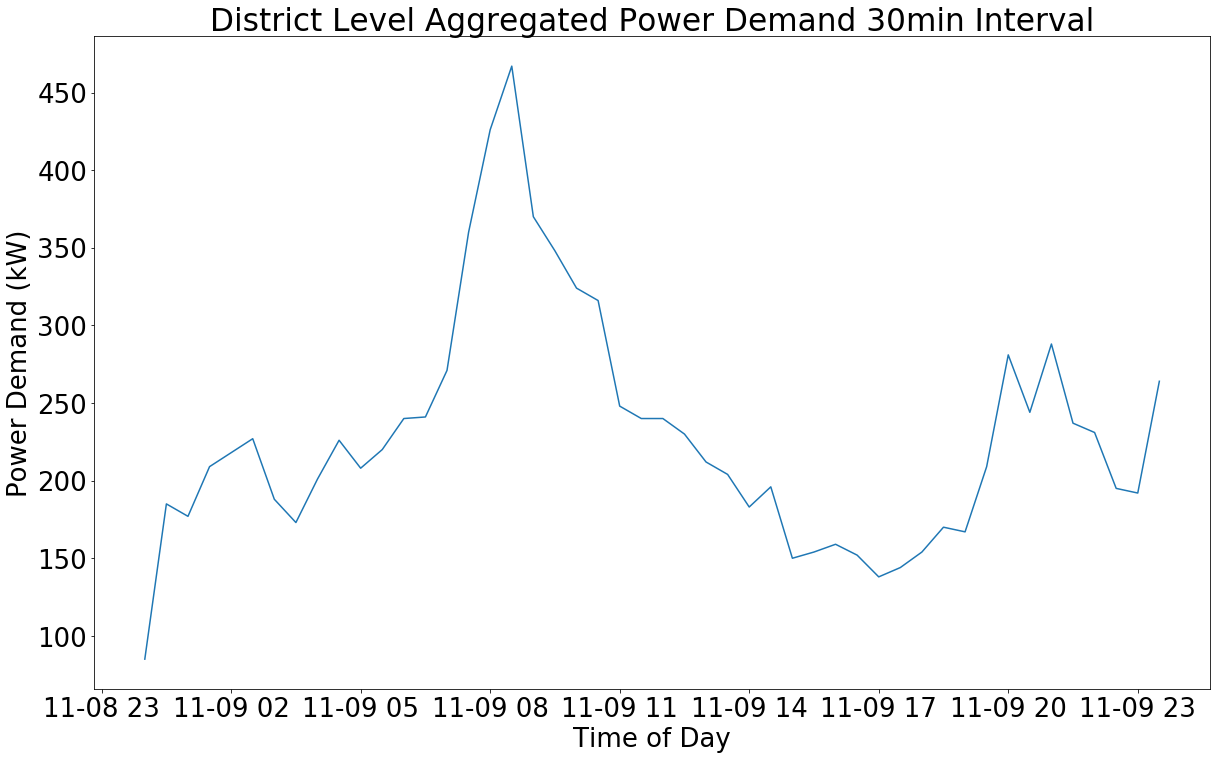

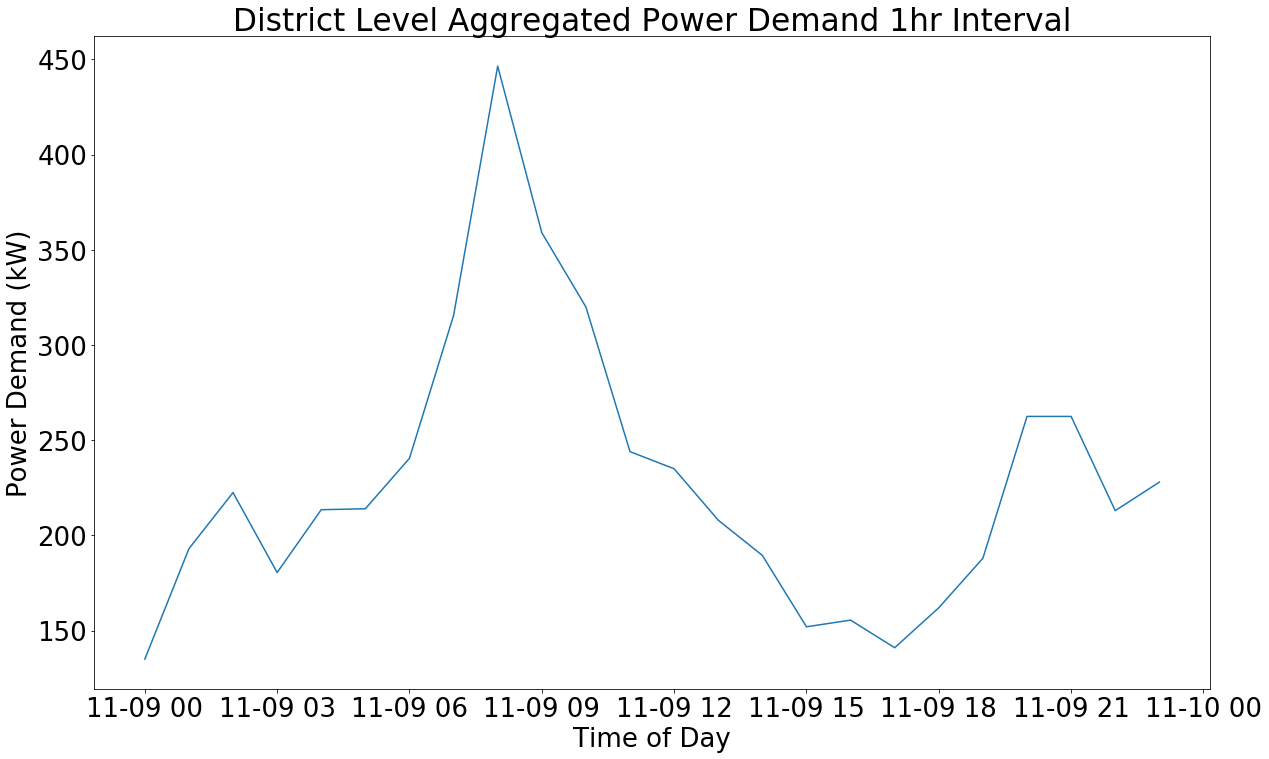

In [58]:
print("In Bao An District, there are {} Teld charging stations and {} piles, among which {} are fast (40kW) and \
{} are slow (7kW)".format(len(baoan_idx_list), numb_baoanPiles, numb_baoanFast, numb_baoanSlow))

timeOfDay = create_timeOfDay(test_date, timestamp)
baoan_power_prof = np.zeros(60/timestamp*24)
baoan_power_prof_24 = np.zeros(24)
for index, station in enumerate(baoan_station_list_copylist):
    
    avg_timeOfPower = get_avg_timeOfPower(station, day_range, timestamp)
    baoan_power_prof += avg_timeOfPower
    for i in range(24):
        baoan_power_prof_24[i] += np.average(avg_timeOfPower[i*(60/timestamp):i*(60/timestamp)+(60/timestamp)])

plt.rc('font', size=26)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, baoan_power_prof)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand {}min Interval".format(timestamp))
# fig.savefig("Baoan_{}min".format(timestamp))
plt.show()

timeOfDay = create_timeOfDay(test_date, timestamp=60)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, baoan_power_prof_24)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand 1hr Interval")
# fig.savefig("Baoan_1hr")
plt.show()

## 8.1.1 Plotting day of week

In [62]:
#Specify Params
test_date = datetime.datetime(2017, 11, 9, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, 
                                                                                   name=None))
day_range = 42
timestamp = 30
#find baoan stations
baoan_station_list_copylist = []
for idx, station in enumerate(staObject_sz_list):
    if idx in baoan_idx_list:
        baoan_station_copy = copy.deepcopy(station)
        baoan_station_copy1 = copy.deepcopy(station)
        baoan_station_copy, boundary_list_grand_station, pill_nodate_baoan = \
        clean_pillUltdata(baoan_station_copy, test_date, day_range)
        baoan_station_copy1 = map_ultdata(baoan_station_copy1, boundary_list_grand_station, 
                                          pill_nodate_baoan, timestamp, day_range, aggregated = 0) #aggregated = 0
        baoan_station_list_copylist.append(baoan_station_copy1)

In [63]:
day_ticks = 60/timestamp*24
day_list = list()
for i in range(7):
    day_lowerBound = datetime.datetime(2017, 11, 9+i)
    day_list.append(day_lowerBound)

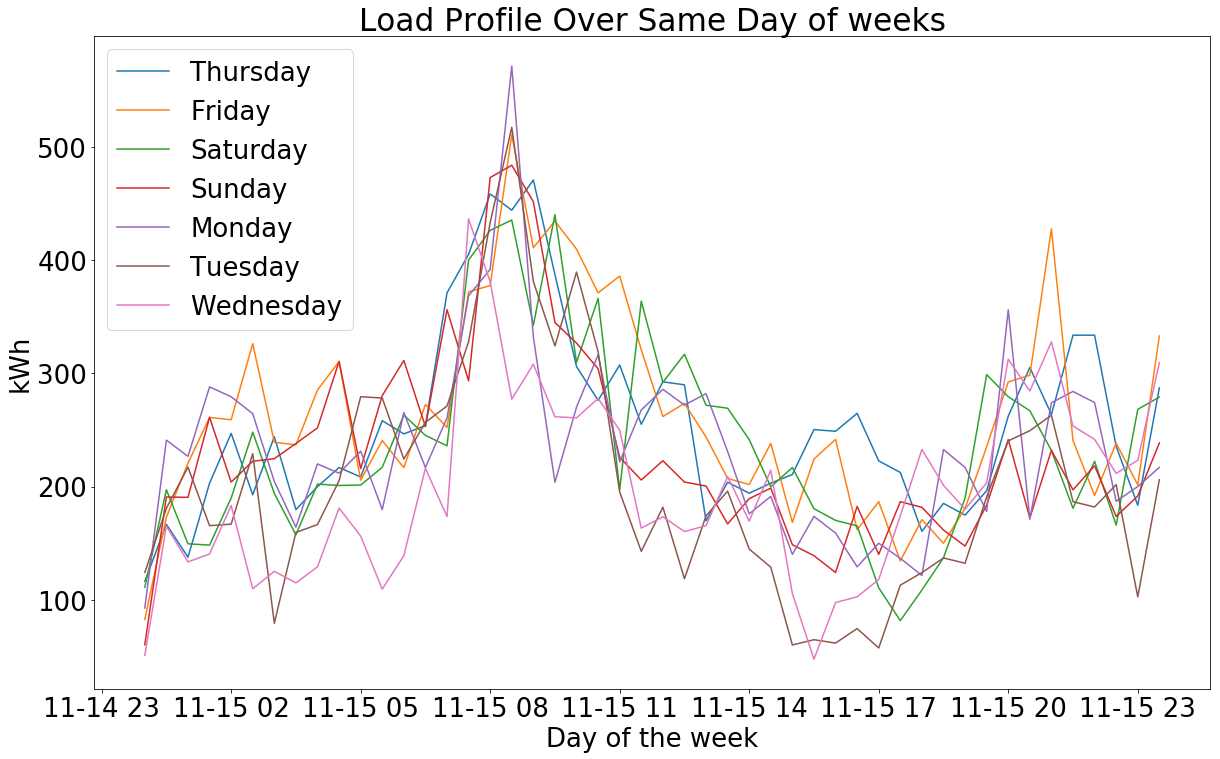

In [64]:
week_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weeks = day_range // 7

baoan_station_powerList = list() #stores all station's daily profile
for station in baoan_station_list_copylist:
    
    power_list = [sum(elem) for elem in station.ult_data]
    power_list = [power_list[i*day_ticks:i*day_ticks+day_ticks] for i in range(day_range)]
    baoan_station_powerList.append(power_list)
timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
for idx, day_lowerBound in enumerate(day_list):

#     timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
    day_lowerBound = day_lowerBound+datetime.timedelta(days=7)
    
    daily_powerList_tot = np.zeros(60/timestamp*24) #store aggregated stations daily profile for a certain day of week
    
    for w in range(weeks):
        
        for profile in baoan_station_powerList:

            daily_powerList_tot += np.array(profile[idx+w*7])
    daily_powerList_tot = daily_powerList_tot / float(weeks)
    
    plt.rc('font', size=26)
    plt.figure(10, figsize=(20,12))
#     plt.scatter(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.plot(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.xlabel("Day of the week".format(day_lowerBound.weekday()+1))
    plt.ylabel("kWh")
    plt.title("Load Profile Over Same Day of weeks")
plt.legend()
plt.show()

# 8.2 District (Nanshan) Aggregated Level of Power Demand

In [90]:
len(staObject_sz_list)

81

In [226]:
nanshan_idx_list = [] 
for idx, station in enumerate(staObject_sz_list):
    if "南山区" in station.addr:
        if len(station.pills[0].ult_data) > 0:
            nanshan_idx_list.append(idx)
            print(station.addr)

广东省深圳市南山区学苑大道水木丹华园小区
广东省深圳市南山区南海大道2748-2
广东省深圳市南山区西丽街道留仙洞战略性新兴产业总部基地
广东省深圳市南山区科技园大冲村科发路与铜鼓路西北角
广东省深圳市南山区高新南一道7号创维半导体设计大厦停车场
广东省深圳市南山区学府路212号
广东省深圳市南山区南海大道4040豪方花园小区
广东省深圳市南山区松白路1008
广东省深圳市南山区创业路与南海大道交汇处
广东省深圳市南山区学苑大道1099号
广东省深圳市南山区高新南一道8-南门创维大厦停车场
广东省深圳市南山区后海滨路百丽大厦
广东省深圳市南山区南山大道1088号南园枫叶大厦地库
广东省深圳市南山区留仙大道2002号
广东省深圳市南山区深圳湾体育中心
广东省深圳市南山区深圳市南山区留仙大道金骐智谷大厦停车场
广东省深圳市南山区石洲中路55号国际市长交流中心
广东省深圳市南山区科技园北区朗山路8号
广东省深圳市南山区深云路6号
广东省深圳市南山区留仙大道1998号崇文花园
广东省深圳市南山区深南大道10188号新豪方大厦
广东省深圳市南山区高新中二道33号豪方现代豪园小区停车场
广东省深圳市南山区丽山路西湖林语名苑
广东省深圳市南山区南头街道南头街62号
广东省深圳市南山区高新新技术园南区高新南六道10号


In [227]:
numb_nanshanPiles = 0
numb_nanshanFast = 0
numb_nanshanSlow = 0
for sta_idx in nanshan_idx_list:
    numb_nanshanPiles += len(staObject_sz_list[sta_idx].pills)
    
    for pill in staObject_sz_list[sta_idx].pills:
        
        if pill.isfast == 'N':
            
            numb_nanshanSlow += 1
        else:
            
            numb_nanshanFast += 1
assert numb_nanshanPiles == numb_nanshanFast + numb_nanshanSlow

In [228]:
#Specify Params
test_date = datetime.datetime(2017, 11, 9, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, 
                                                                                   name=None))
day_range = 40
timestamp = 30
#find Nanshan stations
nanshan_station_list_copylist = []
for idx, station in enumerate(staObject_sz_list):
    if idx in nanshan_idx_list:
        nanshan_station_copy = copy.deepcopy(station)
        nanshan_station_copy1 = copy.deepcopy(station)
        nanshan_station_copy, boundary_list_grand_station, pill_nodate_nanshan = \
        clean_pillUltdata(nanshan_station_copy, test_date, day_range)
        nanshan_station_copy1 = map_ultdata(nanshan_station_copy1, boundary_list_grand_station, 
                                          pill_nodate_nanshan, timestamp, day_range)
        nanshan_station_list_copylist.append(nanshan_station_copy1)

(datetime.datetime(2017, 12, 19, 0, 0, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)), 'find_indexBoundary: no index found')
clean_pillUltdata: boundary_list length is zero
(datetime.datetime(2017, 12, 19, 0, 0, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)), 'find_indexBoundary: no index found')
clean_pillUltdata: boundary_list length is zero


In Nan Shan Distict, there are 25 Teld charging stations and 285 piles, among which 26 are fast (40kW) and 259 are slow (7kW)


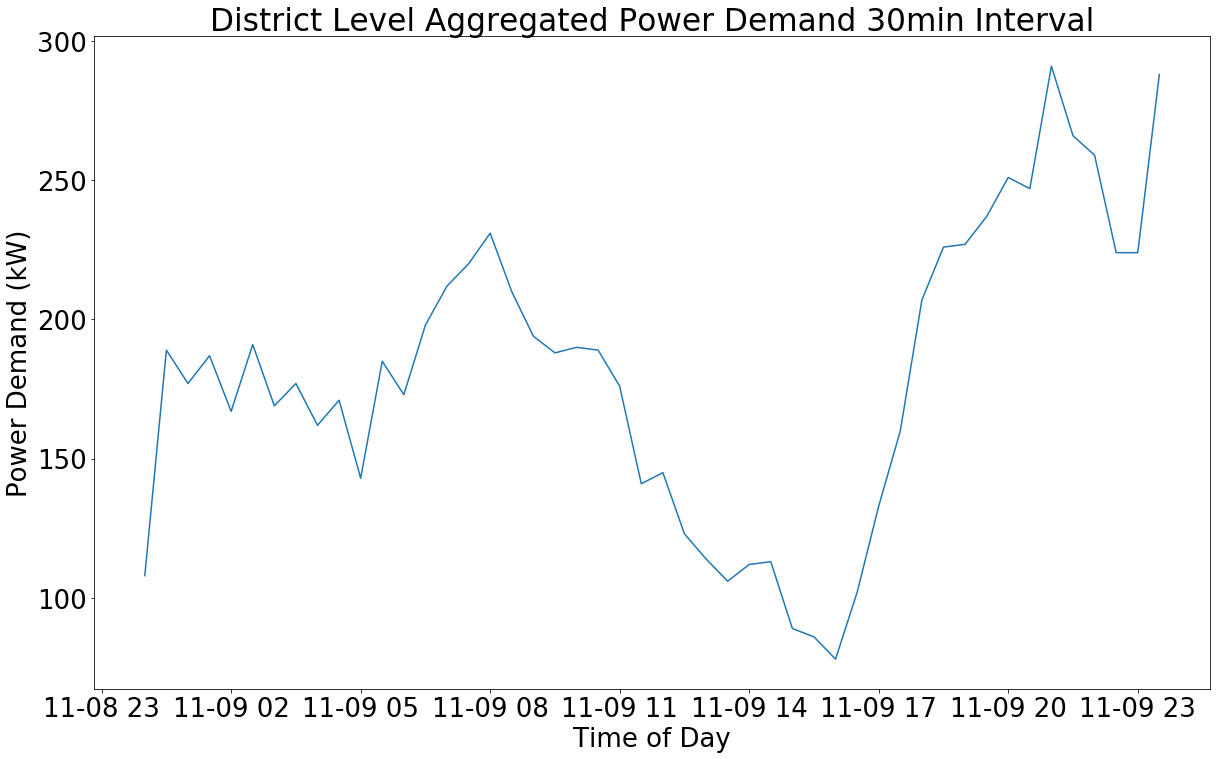

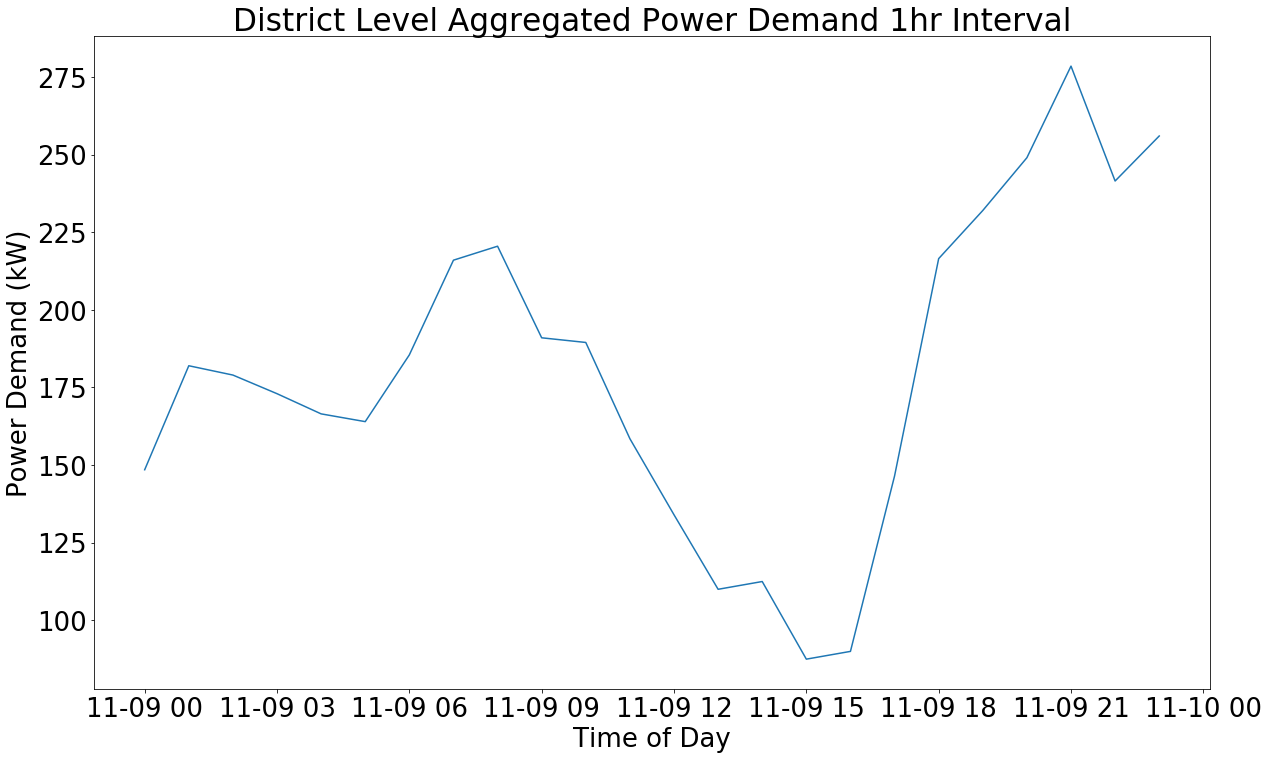

In [229]:
print("In Nan Shan Distict, there are {} Teld charging stations and {} piles, among which {} are fast (40kW) and {} are \
slow (7kW)".format(len(nanshan_idx_list), numb_nanshanPiles, numb_nanshanFast, numb_nanshanSlow))

timeOfDay = create_timeOfDay(test_date, timestamp)
nanshan_power_prof = np.zeros(60/timestamp*24)
nanshan_power_prof_24 = np.zeros(24)
for index, station in enumerate(nanshan_station_list_copylist):
    avg_timeOfPower = get_avg_timeOfPower(station, day_range, timestamp)
    nanshan_power_prof += avg_timeOfPower
    for i in range(24):
        nanshan_power_prof_24[i] += np.average(avg_timeOfPower[i*(60/timestamp):i*(60/timestamp)+(60/timestamp)])

fig = plt.figure(10, figsize=(20,12))
plt.rc('font', size=26)
plt.plot(timeOfDay, nanshan_power_prof)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand {}min Interval".format(timestamp))
# fig.savefig("Nanshan_{}min".format(timestamp))
plt.show()

timeOfDay = create_timeOfDay(test_date, timestamp=60)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, nanshan_power_prof_24)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand 1hr Interval")
# fig.savefig("Nanshan_1hr")
plt.show()

## 8.2.1 Plotting day of week

In [230]:
#Specify Params
test_date = datetime.datetime(2017, 11, 9, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, 
                                                                                   name=None))
day_range = 42
timestamp = 30
#find baoan stations
nanshan_station_list_copylist = []
for idx, station in enumerate(staObject_sz_list):
    if idx in nanshan_idx_list:
        nanshan_station_copy = copy.deepcopy(station)
        nanshan_station_copy1 = copy.deepcopy(station)
        nanshan_station_copy, boundary_list_grand_station, pill_nodate_nanshan = \
        clean_pillUltdata(nanshan_station_copy, test_date, day_range)
        nanshan_station_copy1 = map_ultdata(nanshan_station_copy1, boundary_list_grand_station, 
                                          pill_nodate_nanshan, timestamp, day_range, aggregated = 0) #aggregated = 0
        nanshan_station_list_copylist.append(nanshan_station_copy1)

(datetime.datetime(2017, 12, 21, 0, 0, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)), 'find_indexBoundary: no index found')
clean_pillUltdata: boundary_list length is zero
(datetime.datetime(2017, 12, 21, 0, 0, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, name=None)), 'find_indexBoundary: no index found')
clean_pillUltdata: boundary_list length is zero


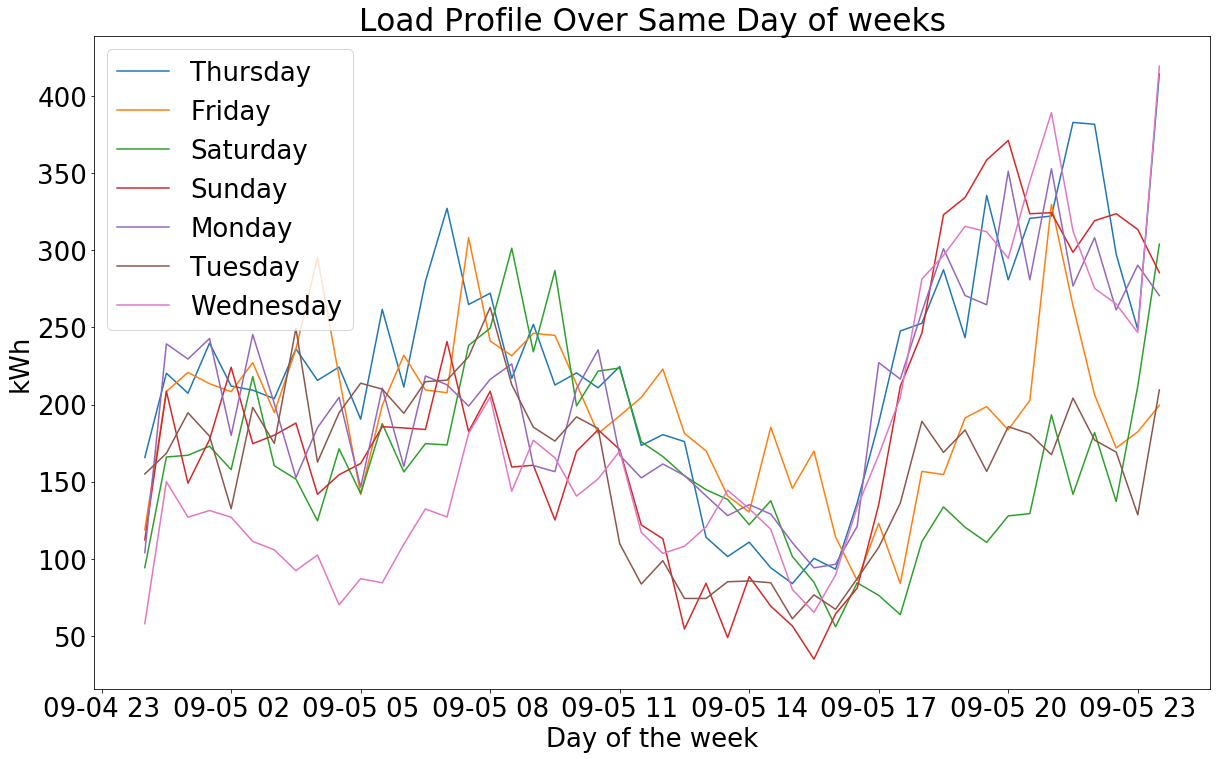

In [245]:
day_ticks = 60/timestamp*24
day_list = list()
for i in range(7):
    day_lowerBound = datetime.datetime(2017, 11, 9+i)
    day_list.append(day_lowerBound)
    
week_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weeks = day_range // 7

nanshan_station_powerList = list() #stores all station's daily profile
for station in nanshan_station_list_copylist:
    
    power_list = [sum(elem) for elem in station.ult_data]
    power_list = [power_list[i*day_ticks:i*day_ticks+day_ticks] for i in range(day_range)]
    nanshan_station_powerList.append(power_list)

#Create x-axis time index
time_list_days = list()
for _ in range(day_range):

    timeOfDay = create_timeOfDay(day_lowerBound)
    time_list_days.extend(timeOfDay)
    day_lowerBound = day_lowerBound+datetime.timedelta(days=7)

#Plot day of week profile
timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
for idx, day_lowerBound in enumerate(day_list):

#     timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
    day_lowerBound = day_lowerBound+datetime.timedelta(days=7)
    
    daily_powerList_tot = np.zeros(60/timestamp*24) #store aggregated stations daily profile for a certain day of week
    
    for w in range(weeks):
        
        for profile in nanshan_station_powerList:

            daily_powerList_tot += np.array(profile[idx+w*7])
    daily_powerList_tot = daily_powerList_tot / float(weeks)
    
    plt.rc('font', size=26)
    plt.figure(10, figsize=(20,12))
#     plt.scatter(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.plot(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.xlabel("Day of the week".format(day_lowerBound.weekday()+1))
    plt.ylabel("kWh")
    plt.title("Load Profile Over Same Day of weeks")
plt.legend()
plt.show()

# 8.3 District (Luohu) Aggregated Level of Power Demand

In [237]:
luohu_idx_list = []
for idx, station in enumerate(staObject_sz_list):
    if "罗湖区" in station.addr:
        if len(station.pills[0].ult_data) > 0:
            luohu_idx_list.append(idx)
            print(station.addr)

广东省深圳市罗湖区人民南路3012号
广东省深圳市罗湖区深南东路金融中心大厦南座京基晶都酒店停车位
广东省深圳市罗湖区太宁路百仕达三期
广东省深圳市罗湖区清水河一路
广东省深圳市罗湖区深南东路5033-南门
广东省深圳市罗湖区沿河北路1002号
广东省深圳市罗湖区文锦中路52号
广东省深圳市罗湖区深南东路2098号
广东省深圳市罗湖区深南东路1086集浩大厦停车场
广东省深圳市罗湖区深南东路4002号
广东省深圳市罗湖区沿河北路1002路瑞思国际大厦


In [238]:
numb_luohuPiles = 0
numb_luohuFast = 0
numb_luohuSlow = 0
for sta_idx in luohu_idx_list:
    numb_luohuPiles += len(staObject_sz_list[sta_idx].pills)
    
    for pill in staObject_sz_list[sta_idx].pills:
        
        if pill.isfast == 'N':
            
            numb_luohuSlow += 1
        else:
            
            numb_luohuFast += 1
assert numb_luohuPiles == numb_luohuFast + numb_luohuSlow

In [239]:
#Specify Params
test_date = datetime.datetime(2017, 10, 10, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, 
                                                                                   name=None))
day_range = 50
timestamp = 30
#find Nanshan stations
luohu_station_list_copylist = []
for idx, station in enumerate(staObject_sz_list):
    if idx in luohu_idx_list:
        luohu_station_copy = copy.deepcopy(station)
        luohu_station_copy1 = copy.deepcopy(station)
        luohu_station_copy, boundary_list_grand_station, pill_nodate_luohu = \
        clean_pillUltdata(luohu_station_copy, test_date, day_range)
        luohu_station_copy1 = map_ultdata(luohu_station_copy1, boundary_list_grand_station, 
                                          pill_nodate_luohu, timestamp, day_range)
        luohu_station_list_copylist.append(luohu_station_copy1)

In Luo Hu Distict, there are 11 Teld charging stations and 106 piles, among which 16 are fast (40kW) and 90 are slow (7kW)


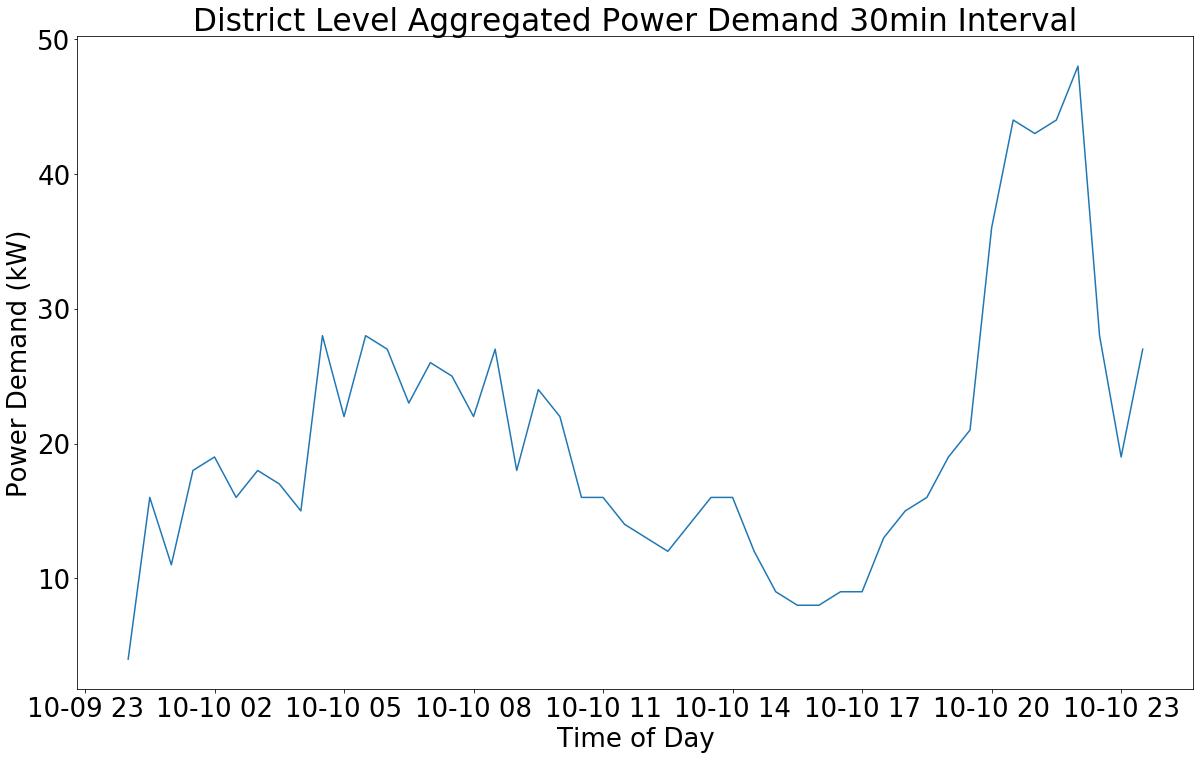

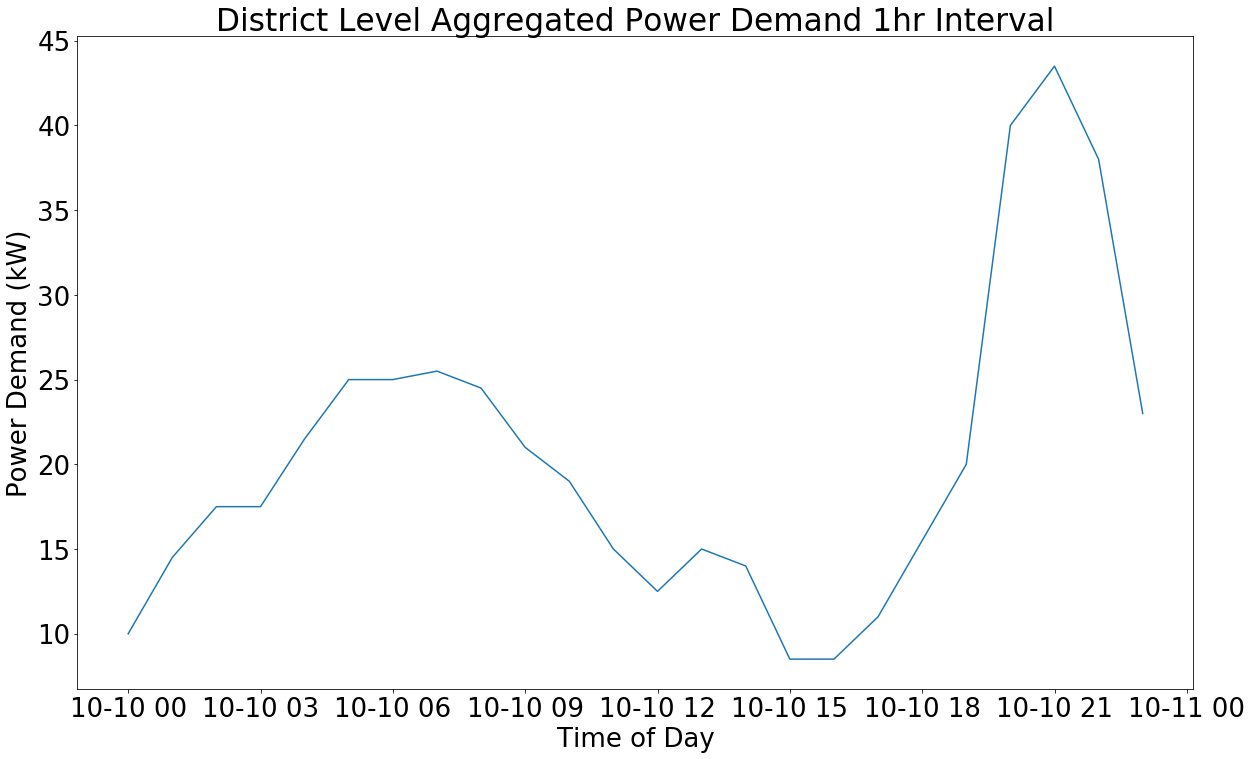

In [240]:
print("In Luo Hu Distict, there are {} Teld charging stations and {} piles, among which {} are fast (40kW) and {} are \
slow (7kW)".format(len(luohu_idx_list), numb_luohuPiles, numb_luohuFast, numb_luohuSlow))

timeOfDay = create_timeOfDay(test_date, timestamp)
luohu_power_prof = np.zeros(60/timestamp*24)
luohu_power_prof_24 = np.zeros(24)
for index, station in enumerate(luohu_station_list_copylist):
    
    avg_timeOfPower = get_avg_timeOfPower(station, day_range, timestamp)
    luohu_power_prof += avg_timeOfPower
    for i in range(24):
        luohu_power_prof_24[i] += np.average(avg_timeOfPower[i*(60/timestamp):i*(60/timestamp)+(60/timestamp)])

plt.rc('font', size=26)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, luohu_power_prof)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand {}min Interval".format(timestamp))
# fig.savefig("Luohu_{}min".format(timestamp))
plt.show()

timeOfDay = create_timeOfDay(test_date, timestamp=60)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, luohu_power_prof_24)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand 1hr Interval")
# fig.savefig("Luohu_1hr")
plt.show()

## 8.3.1 Plotting day of week

In [241]:
#Specify Params
test_date = datetime.datetime(2017, 11, 9, tzinfo=psycopg2.tz.FixedOffsetTimezone(offset=-420, 
                                                                                   name=None))
day_range = 42
timestamp = 30
#find baoan stations
luohu_station_list_copylist = []
for idx, station in enumerate(staObject_sz_list):
    if idx in luohu_idx_list:
        luohu_station_copy = copy.deepcopy(station)
        luohu_station_copy1 = copy.deepcopy(station)
        luohu_station_copy, boundary_list_grand_station, pill_nodate_luohu = \
        clean_pillUltdata(luohu_station_copy, test_date, day_range)
        luohu_station_copy1 = map_ultdata(luohu_station_copy1, boundary_list_grand_station, 
                                          pill_nodate_luohu, timestamp, day_range, aggregated = 0) #aggregated = 0
        luohu_station_list_copylist.append(luohu_station_copy1)

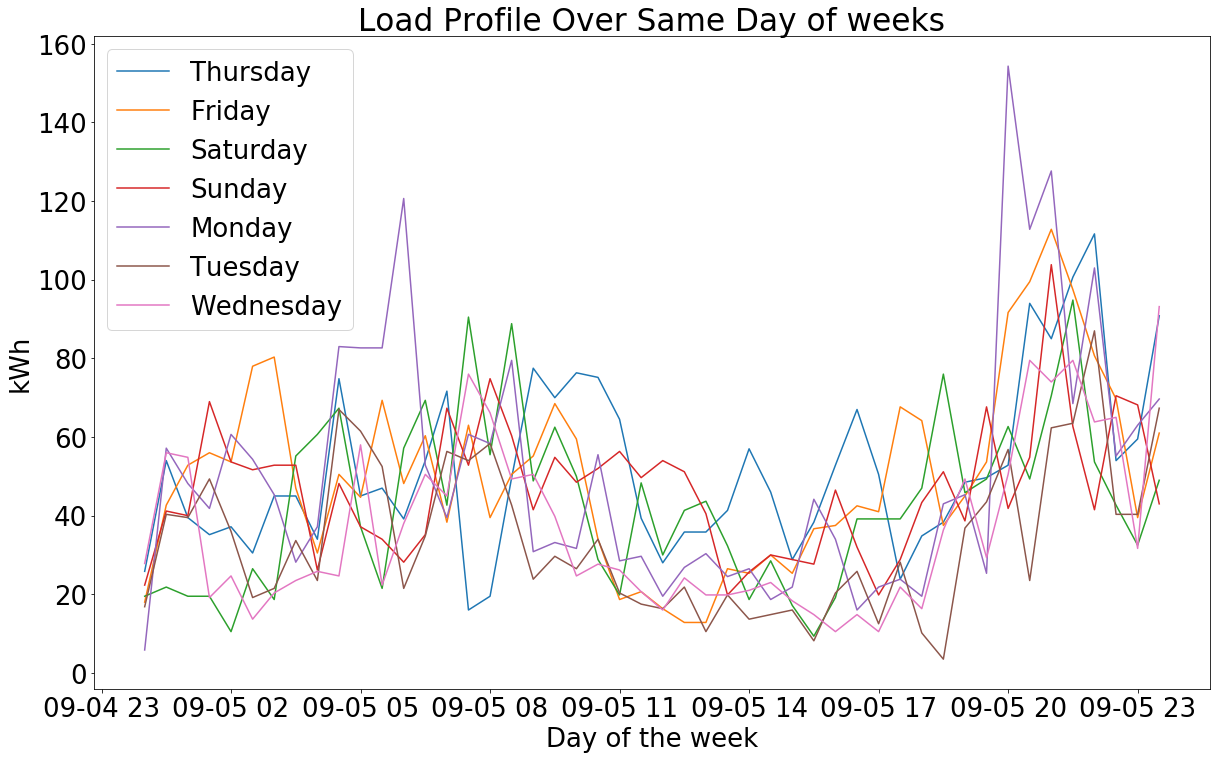

In [244]:
day_ticks = 60/timestamp*24
day_list = list()
for i in range(7):
    day_lowerBound = datetime.datetime(2017, 11, 9+i)
    day_list.append(day_lowerBound)
    
week_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weeks = day_range // 7

luohu_station_powerList = list() #stores all station's daily profile
for station in luohu_station_list_copylist:
    
    power_list = [sum(elem) for elem in station.ult_data]
    power_list = [power_list[i*day_ticks:i*day_ticks+day_ticks] for i in range(day_range)]
    luohu_station_powerList.append(power_list)

#Create x-axis time index 
time_list_days = list()
for _ in range(day_range):

    timeOfDay = create_timeOfDay(day_lowerBound)
    time_list_days.extend(timeOfDay)
    day_lowerBound = day_lowerBound+datetime.timedelta(days=7)

#Plot day of week profile
timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
for idx, day_lowerBound in enumerate(day_list):

#     timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
    day_lowerBound = day_lowerBound+datetime.timedelta(days=7)
    
    daily_powerList_tot = np.zeros(60/timestamp*24) #store aggregated stations daily profile for a certain day of week
    
    for w in range(weeks):
        
        for profile in luohu_station_powerList:

            daily_powerList_tot += np.array(profile[idx+w*7])
    daily_powerList_tot = daily_powerList_tot / float(weeks)
            
    plt.figure(10, figsize=(20,12))
#     plt.scatter(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.plot(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.xlabel("Day of the week".format(day_lowerBound.weekday()+1))
    plt.ylabel("kWh")
    plt.title("Load Profile Over Same Day of weeks")
plt.legend()
plt.show()

# 8.4 Three Districts Aggregated

Three districts, there are 53 Teld charging stations and 597 piles, among which 69 are fast (40kW) and 528 are slow (7kW)


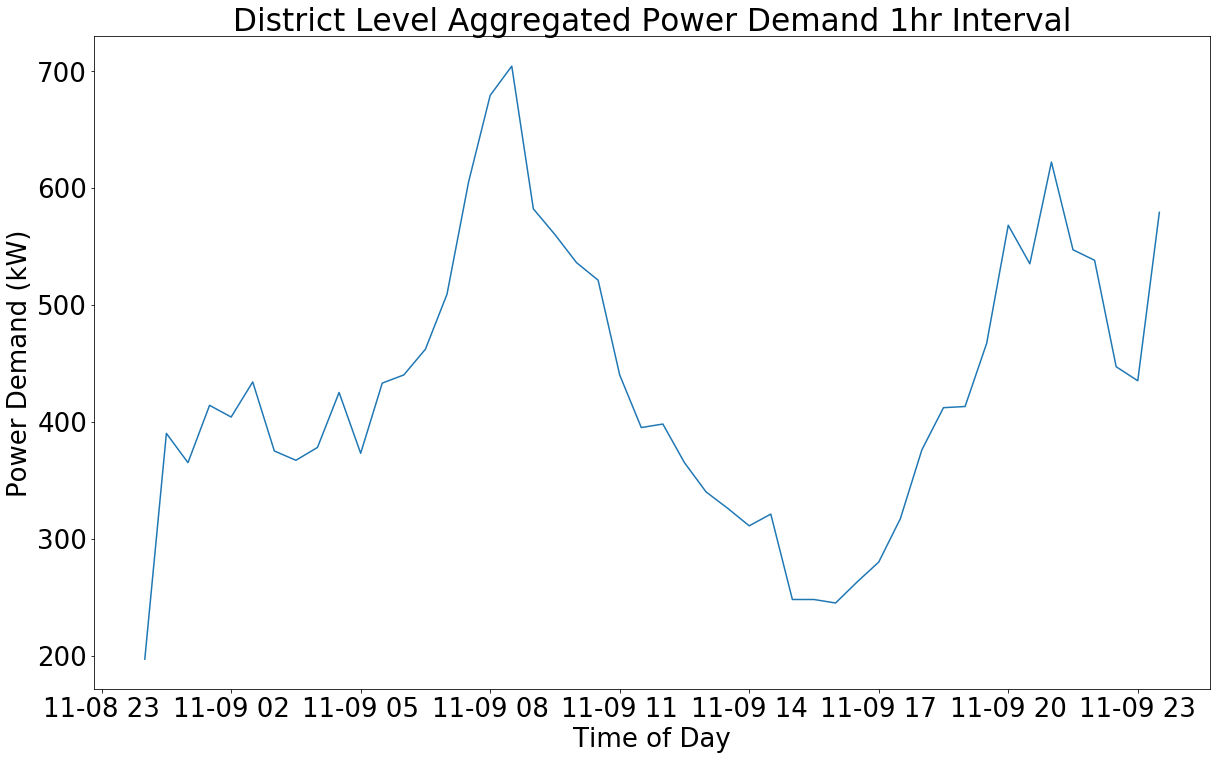

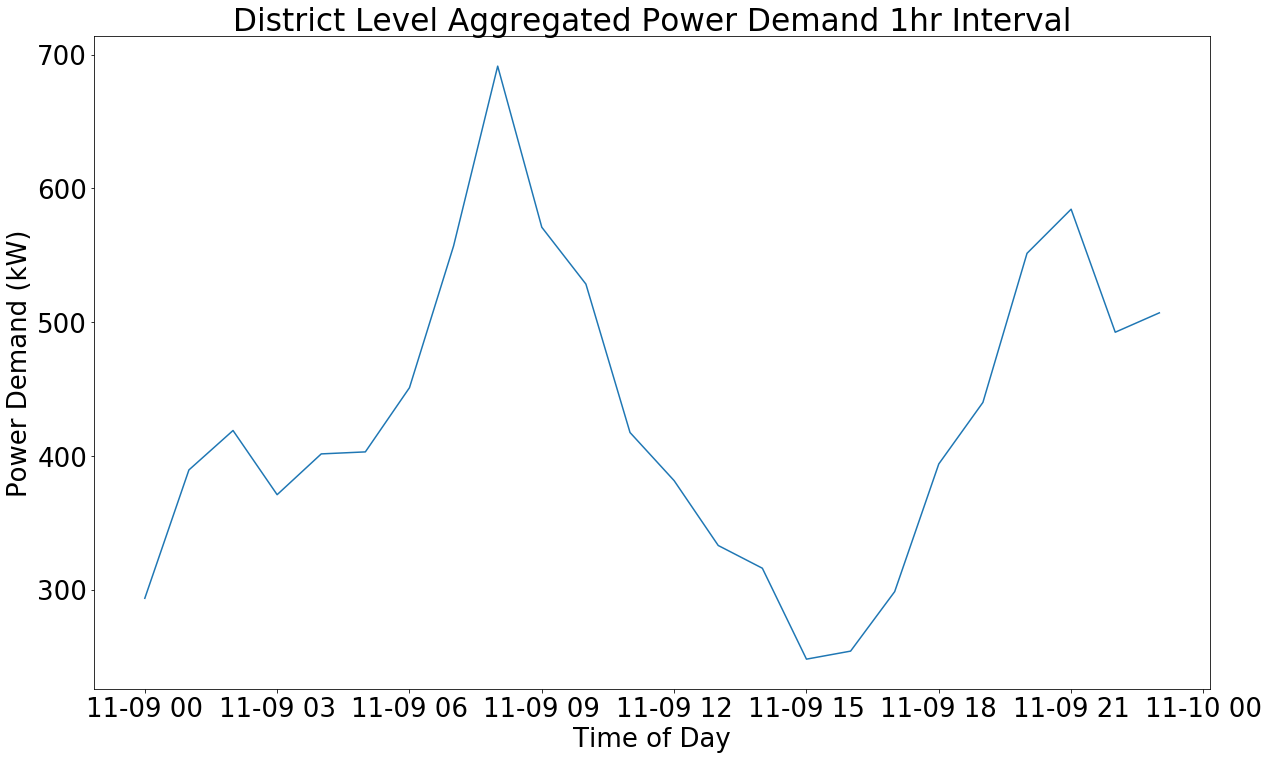

In [246]:
print("Three districts, there are {} Teld charging stations and {} piles, among which {} are fast (40kW) and {} are \
slow (7kW)".format(len(luohu_idx_list)+len(baoan_idx_list)+len(nanshan_idx_list), \
                   numb_luohuPiles+numb_nanshanPiles+numb_baoanPiles, numb_luohuFast+numb_nanshanFast+numb_baoanFast, \
                   numb_luohuSlow+numb_nanshanSlow+numb_baoanSlow))

timeOfDay = create_timeOfDay(test_date, timestamp=30)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, baoan_power_prof+luohu_power_prof+nanshan_power_prof)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand 1hr Interval")
fig.savefig("Three Districts Aggregated Load Deman_{}min".format(timestamp))
plt.show()

timeOfDay = create_timeOfDay(test_date, timestamp=60)
fig = plt.figure(10, figsize=(20,12))
plt.plot(timeOfDay, baoan_power_prof_24+luohu_power_prof_24+nanshan_power_prof_24)
plt.xlabel("Time of Day")
plt.ylabel("Power Demand (kW)")
plt.title("District Level Aggregated Power Demand 1hr Interval")
fig.savefig("Three Districts Aggregated Load Demand_1hr")
plt.show()

## 8.4.1 Three Districts Aggregated Day of Week Demand Profile

Three districts, there are 53 Teld charging stations and 597 piles, among which 69 are fast (40kW) and 528 are slow (7kW)


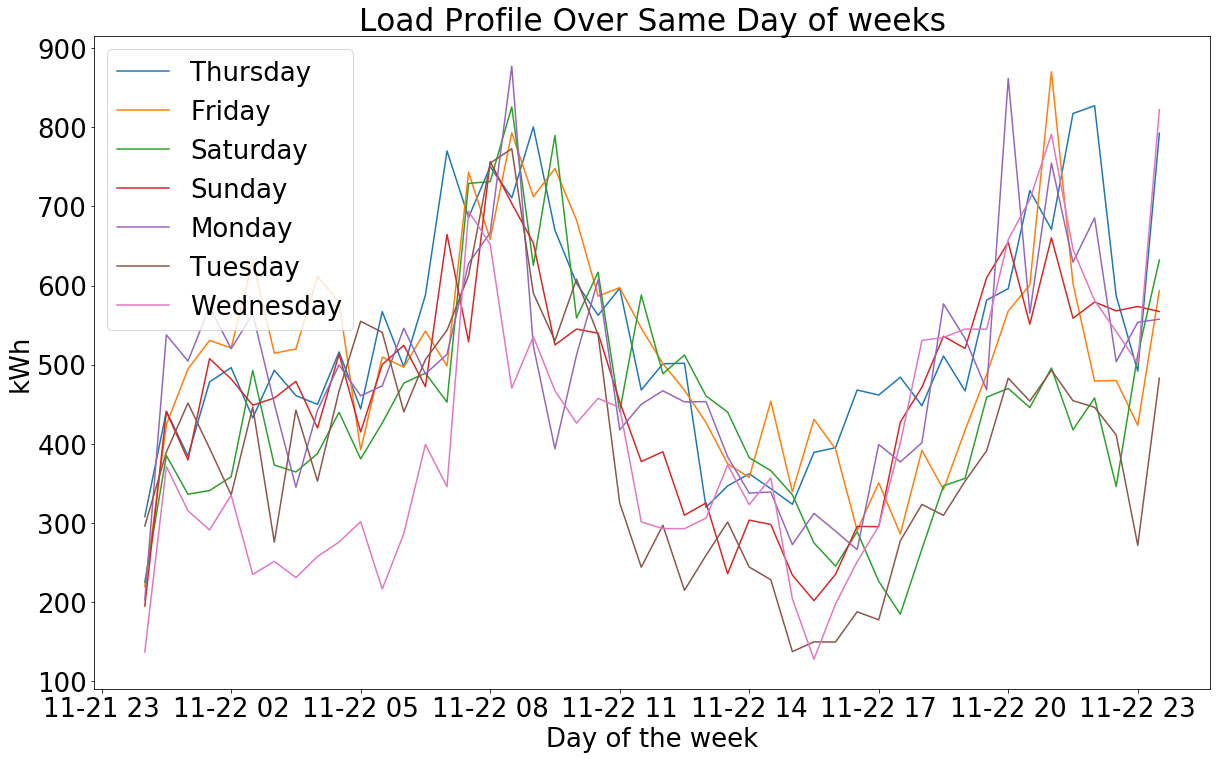

In [249]:
#Plot day of week profile
print("Three districts, there are {} Teld charging stations and {} piles, among which {} are fast (40kW) and {} are \
slow (7kW)".format(len(luohu_idx_list)+len(baoan_idx_list)+len(nanshan_idx_list), \
                   numb_luohuPiles+numb_nanshanPiles+numb_baoanPiles, numb_luohuFast+numb_nanshanFast+numb_baoanFast, \
                   numb_luohuSlow+numb_nanshanSlow+numb_baoanSlow))
timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
for idx, day_lowerBound in enumerate(day_list):

#     timeOfDay = create_timeOfDay(day_lowerBound, timestamp=30)
    day_lowerBound = day_lowerBound+datetime.timedelta(days=7)
    
    daily_powerList_tot = np.zeros(60/timestamp*24) #store aggregated stations daily profile for a certain day of week
    
    for w in range(weeks):
        
        for profile in luohu_station_powerList:

            daily_powerList_tot += np.array(profile[idx+w*7])
            
        for profile in nanshan_station_powerList:

            daily_powerList_tot += np.array(profile[idx+w*7])
            
        for profile in baoan_station_powerList:

            daily_powerList_tot += np.array(profile[idx+w*7])
            
    daily_powerList_tot = daily_powerList_tot / float(weeks)
    
    plt.figure(10, figsize=(20,12))
#     plt.scatter(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.plot(timeOfDay, daily_powerList_tot, label=week_list[day_lowerBound.weekday()])
    plt.xlabel("Day of the week".format(day_lowerBound.weekday()+1))
    plt.ylabel("kWh")
    plt.title("Load Profile Over Same Day of weeks")
plt.legend()
plt.show()

# 8.5 Charging Sessions Visualization

In [250]:
#for one station
station = staObject_sz_list[1]
startDay = 9
startDate = datetime.datetime(2017, 11, startDay)
day_range = 42

def update_charSession(station, startDate, day_range):
    """
        Construct a dictionary containing charging session for both fast and slow charge.
    """
    #initiate charging session recorder
    sessionDuration = {"0207":[], "0240":[]}
    
    for pill in station.pills:

        if pill.isfast == "N":
            isfast = False
        else:
            isfast = True

        startChar = False

        for idx, elem in enumerate(pill.ult_data):

            if elem[0] == "02":
                #new charging session
                if not startChar:

                    sessionTime_start = elem[2]
                    startIdx = idx
                    startChar = True

                else:
                    #keep tracking
                    if idx+1 != len(pill.ult_data):
                        if pill.ult_data[idx+1] != "02":
                            #end time of current charging session
                            duration = elem[2] - sessionTime_start + datetime.timedelta(0, 1800, 0)
                            if isfast:
                                sessionDuration["0240"].append(duration)
                                startChar = False
                            else:
                                sessionDuration["0207"].append(duration)
                                startChar = False

                        else:
                            #charging session going, keep tracking
                            pass
                    else:
                        #reaching end of the ult_date profile
                        duration = elem[2] - sessionTime_start + datetime.timedelta(0, 1800, 0)
                        if isfast:
                            sessionDuration["0240"].append(duration)
                        else:
                            sessionDuration["0207"].append(duration)
            else:
                #not charging and we ignore
                pass
            
    return sessionDuration

In [251]:
def session_histagram(sessionDuration):
    sixHour = datetime.timedelta(0, 3600*6, 0)
    fiveHour = datetime.timedelta(0, 3600*5, 0)
    fourHour = datetime.timedelta(0, 3600*4, 0)
    threeHour = datetime.timedelta(0, 3600*3, 0)
    twoHour = datetime.timedelta(0, 3600*2, 0)
    oneHour = datetime.timedelta(0, 3600, 0)
    halfHour = datetime.timedelta(0, 1800, 0)
    tenmin = datetime.timedelta(0, 600, 0)
    slowchargeSession = list()
    fastchargeSession = list()
    for idx, elem in enumerate(sessionDuration["0207"]):
        
        if elem > sixHour:
            slowchargeSession.append(6)
        elif elem > fiveHour:
            slowchargeSession.append(5)
        elif elem > fourHour:
            slowchargeSession.append(4)
        elif elem > threeHour:
            slowchargeSession.append(3)
        elif elem > twoHour:
            slowchargeSession.append(2)
        elif elem > oneHour:
            slowchargeSession.append(1)
        elif elem > halfHour:
            slowchargeSession.append(0.5)
        elif elem > tenmin:
            slowchargeSession.append(0.16)
        else:
            slowchargeSession.append(0)
    
    if len(sessionDuration["0240"]) != 0:
        for idx, elem in enumerate(sessionDuration["0240"]):
            
            if elem > sixHour:
                fastchargeSession.append(6)
            elif elem > fiveHour:
                fastchargeSession.append(5)
            elif elem > fourHour:
                fastchargeSession.append(4)
            elif elem > threeHour:
                fastchargeSession.append(3)
            elif elem > twoHour:
                fastchargeSession.append(2)
            elif elem > oneHour:
                fastchargeSession.append(1)
            elif elem > halfHour:
                fastchargeSession.append(0.5)
            elif elem > tenmin:
                fastchargeSession.append(0.16)
            else:
                fastchargeSession.append(0)
    return slowchargeSession, fastchargeSession

In [252]:
sessionDuration_grandList = {"0207":[], "0240":[]}

if __name__ == "__main__":

    for station in staObject_sz_list:
        
        station.sessionDuration = update_charSession(station, startDate, day_range)
        sessionDuration_grandList["0207"].extend(station.sessionDuration["0207"])
        sessionDuration_grandList["0240"].extend(station.sessionDuration["0240"])
    
    slowchargeSession, fastchargeSession = session_histagram(sessionDuration_grandList)

## 8.5.1 Visualization

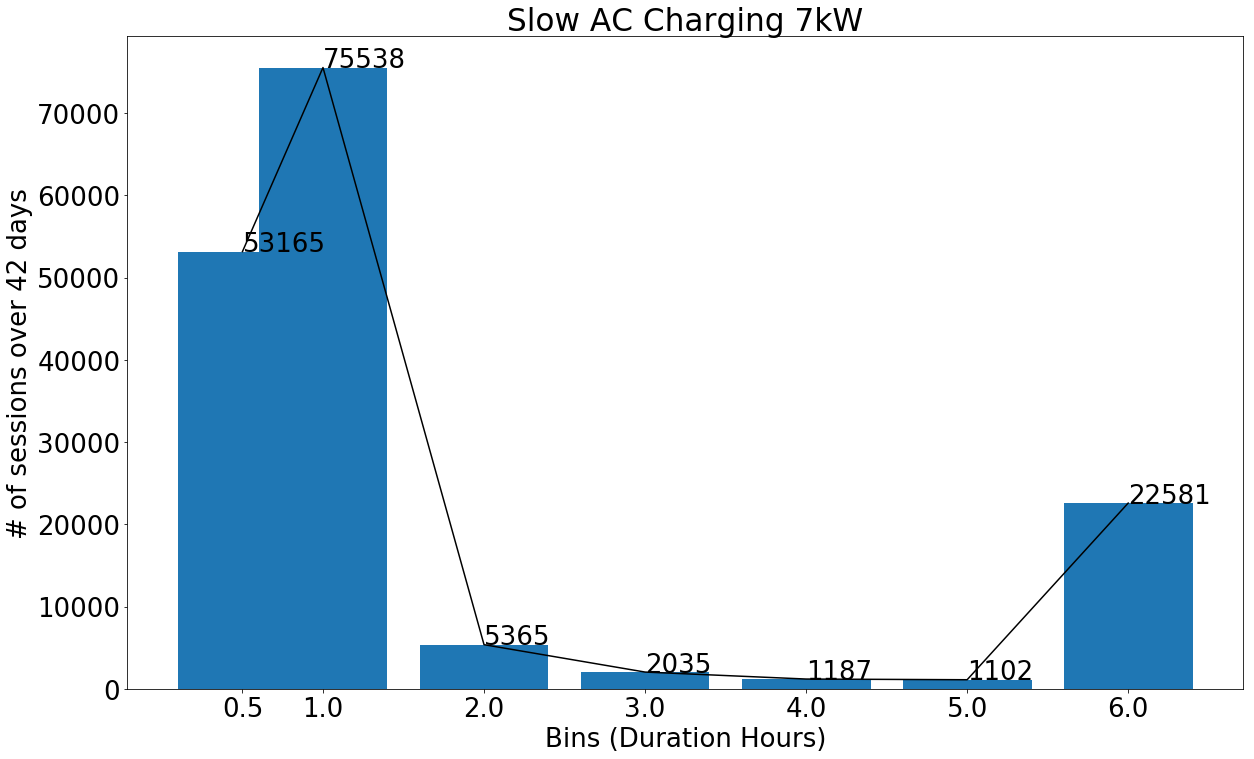

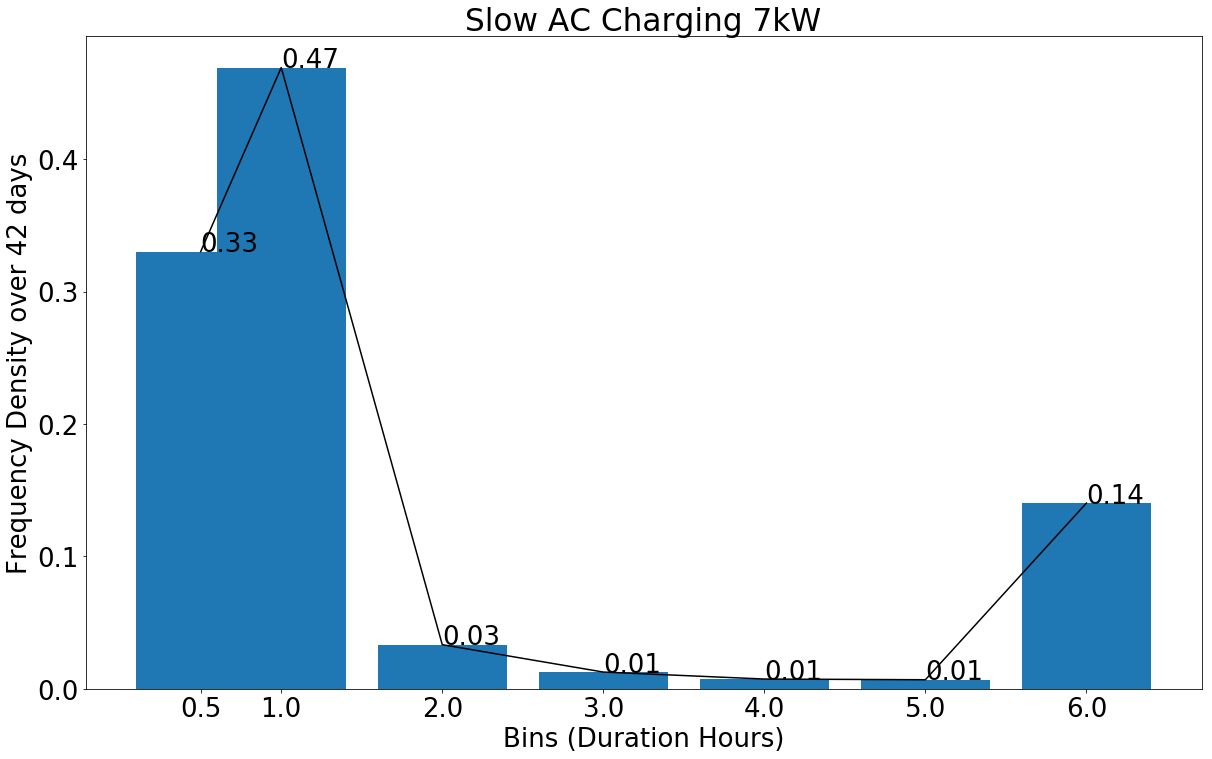

In [253]:
#AC charging session duration plot
slow_unique, slow_counts = np.unique(slowchargeSession, return_counts=True)
#     print(station.name)
plt.figure(10, figsize=(20,12))
plt.bar(slow_unique, slow_counts)
plt.plot(slow_unique, slow_counts, color = "black")
plt.xticks(slow_unique)
plt.xlabel("Bins (Duration Hours)")
plt.ylabel("# of sessions over {} days".format(day_range))
for i, txt in enumerate(slow_counts):
    plt.annotate(txt, (slow_unique[i],slow_counts[i]))
plt.title("Slow AC Charging 7kW")
plt.show()

#plot histagram
plt.figure(10, figsize=(20,12))
normalized_slowC = slow_counts/float(sum(slow_counts))
plt.bar(slow_unique, normalized_slowC)
plt.plot(slow_unique, normalized_slowC, color = "black")
plt.xticks(slow_unique)
plt.xlabel("Bins (Duration Hours)")
plt.ylabel("Frequency Density over {} days".format(day_range))
for i, txt in enumerate(normalized_slowC):
    plt.annotate(np.round(txt,2), (slow_unique[i], normalized_slowC[i]))
plt.title("Slow AC Charging 7kW")
plt.show()

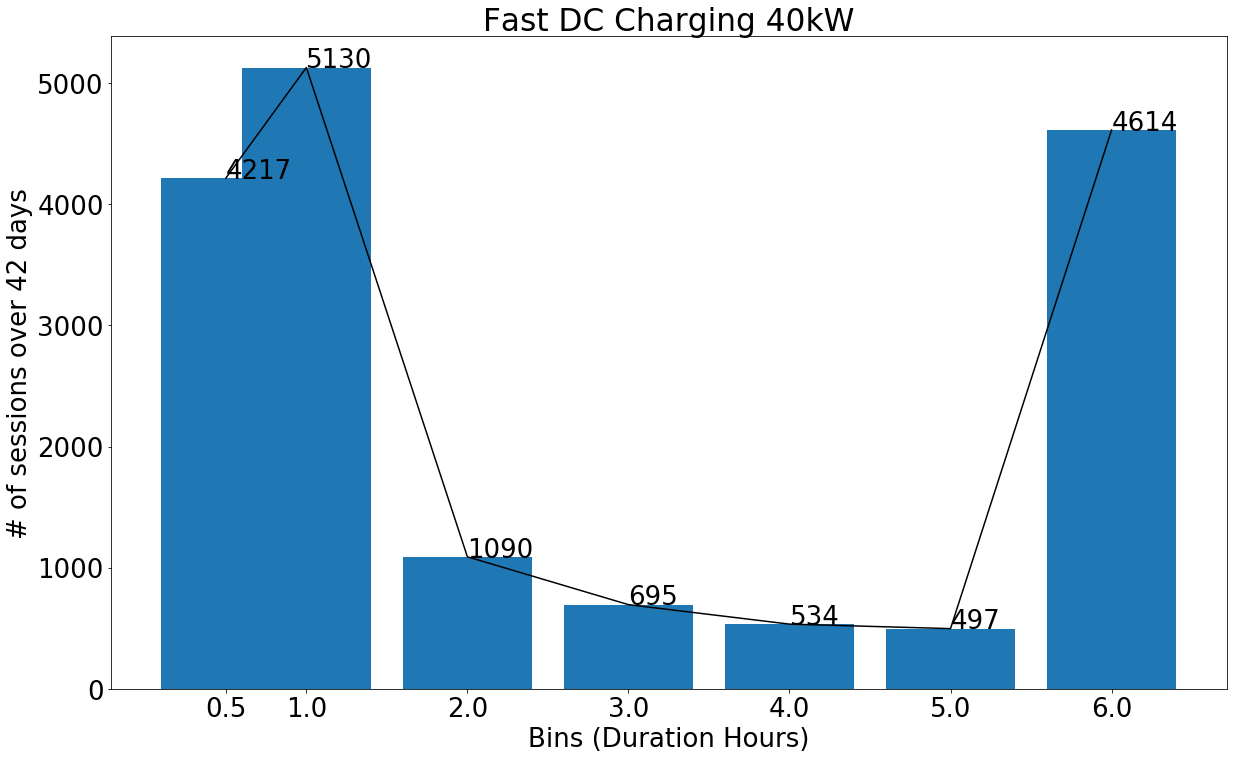

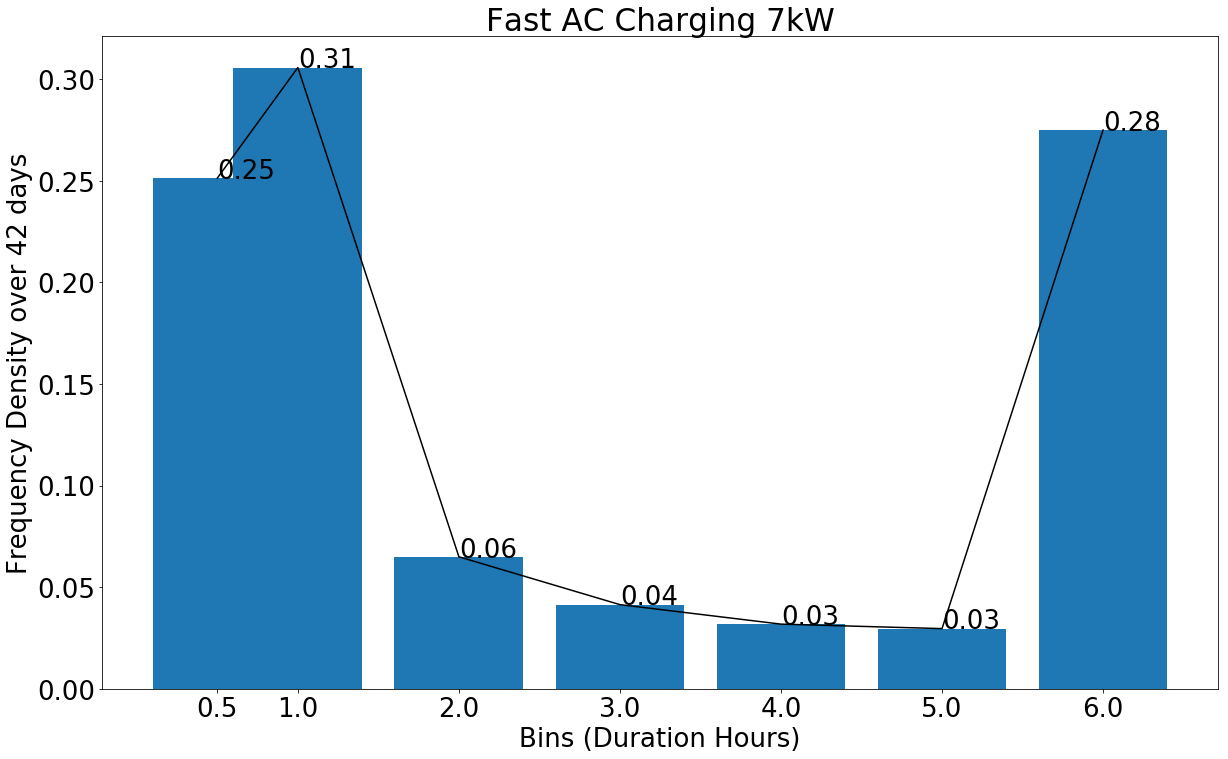

In [257]:
#DC chargign session duration plot
fast_unique, fast_counts = np.unique(fastchargeSession, return_counts=True)
#     print(station.name)
plt.rc('font', size=26)
plt.figure(10, figsize=(20,12))
plt.bar(fast_unique, fast_counts)
plt.plot(fast_unique, fast_counts, color = "black")
plt.xticks(fast_unique)
plt.xlabel("Bins (Duration Hours)")
plt.ylabel("# of sessions over {} days".format(day_range))
for i, txt in enumerate(fast_counts):
    plt.annotate(txt, (fast_unique[i],fast_counts[i]))
plt.title("Fast DC Charging 40kW")
plt.show()

#plot histagram
plt.figure(10, figsize=(20,12))
normalized_fastC = fast_counts/float(sum(fast_counts))
plt.bar(slow_unique, normalized_fastC)
plt.plot(slow_unique, normalized_fastC, color = "black")
plt.xticks(slow_unique)
plt.xlabel("Bins (Duration Hours)")
plt.ylabel("Frequency Density over {} days".format(day_range))
for i, txt in enumerate(normalized_fastC):
    plt.annotate(np.round(txt,2), (slow_unique[i], normalized_fastC[i]))
plt.title("Fast AC Charging 7kW")
plt.show()

# 9 Integrated Daily Energy Profile

In [61]:
def energy_sum(daily_power, index, timestamp=15):
    """
        daily_power is a list of 96 entries for daily load demand
    """
    ene = 0
    for i in range((index+1)*timestamp/15):
        ene += daily_power[i] * (0.25)
    return ene
def cumulative_ener(daily_power, timestamp=15):
    daily_cumu_ene = []
    day_ticks = 60/timestamp*24 
    for i in range(day_ticks):
        daily_cumu_ene.append(energy_sum(daily_power, i, timestamp))
    return daily_cumu_ene

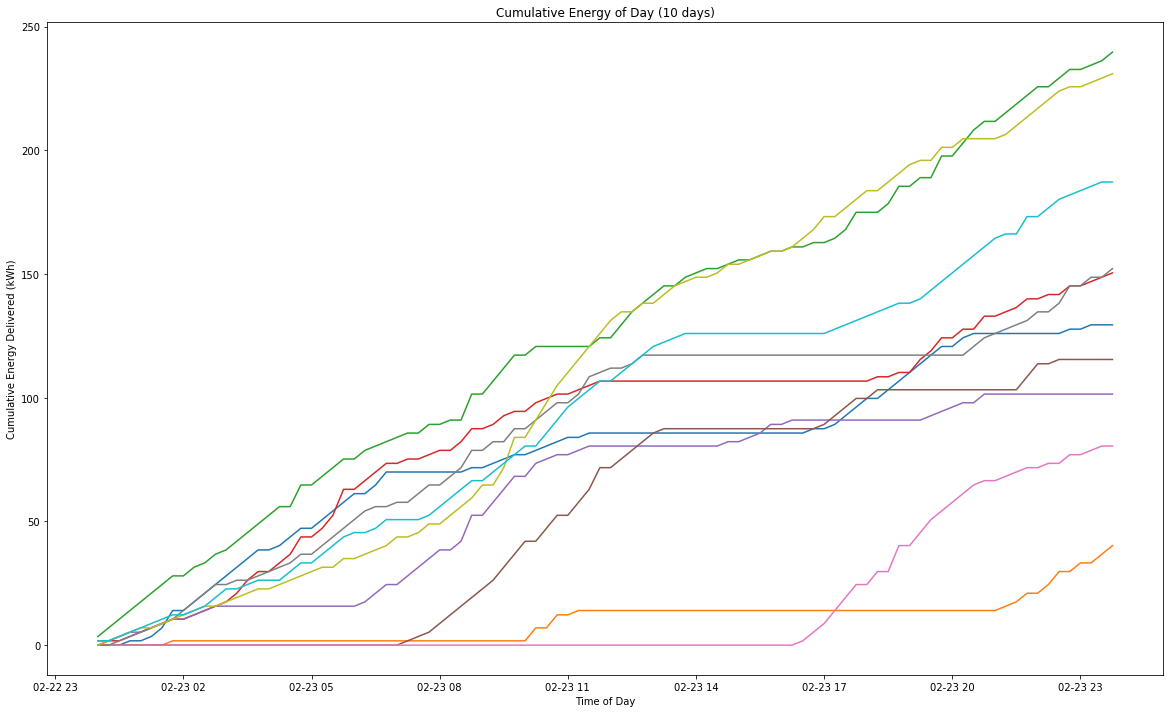

In [62]:
#Plot some days of cumulative energy daily profile
days = 10
for daily_power in power_list_tot_daily[:days]:
    daily_cumu_ene = cumulative_ener(daily_power, timestamp=timestamp)
    plt.figure(10, figsize=(20,12))
    plt.plot(timeOfDay, daily_cumu_ene)
    plt.xlabel("Time of Day")
    plt.ylabel("Cumulative Energy Delivered (kWh)")
plt.title("Cumulative Energy of Day ({} days)".format(days))
plt.show()

In [278]:
#Get total list of cumulative energy list
timestamp = 30
Yinxing_daily_cumEne_list = [cumulative_ener(daily_power, timestamp=timestamp) for daily_power in power_list_tot_daily]

In [279]:
timeOfDay = create_timeOfDay(test_date, timestamp=timestamp)

In [280]:
len(Yinxing_daily_cumEne_list[0])

48

In [200]:
X_test.shape

(96, 120)